## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- Remove the # in the line below. Run only once for each computer!
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [17]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/v.0.23.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.23'

## Extracting metadata

In [19]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r'/Users/kyledayton/Downloads/09.16.22 Raman Files/09.16.22 Text Files'
spectra_path=r'/Users/kyledayton/Downloads/09.16.22 Raman Files/09.16.22 Spectra /09.16.22 Ne Spectra'

# Find files


# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext_meta='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Ne_files_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

Ne_files_meta


['NE 1.txt',
 'NE 10.txt',
 'NE 11.txt',
 'NE 12.txt',
 'NE 13.txt',
 'NE 14.txt',
 'NE 15.txt',
 'NE 16.txt',
 'NE 17.txt',
 'NE 18.txt',
 'NE 19.txt',
 'NE 2.txt',
 'NE 20.txt',
 'NE 21.txt',
 'NE 22.txt',
 'NE 23.txt',
 'NE 24.txt',
 'NE 25.txt',
 'NE 26.txt',
 'NE 27.txt',
 'NE 28.txt',
 'NE 29.txt',
 'NE 3.txt',
 'NE 30.txt',
 'NE 31.txt',
 'NE 32.txt',
 'NE 33.txt',
 'NE 34.txt',
 'NE 35.txt',
 'NE 36.txt',
 'NE 37.txt',
 'NE 4.txt',
 'NE 5.txt',
 'NE 6.txt',
 'NE 7.txt',
 'NE 8.txt',
 'NE 9.txt']

In [20]:
## Image file says Video Image

In [21]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=Ne_files_meta, prefix=False, trupower=True)
meta.head()

100%|█████████████████████████████████████████| 37/37 [00:00<00:00, 1469.12it/s]

Done


filename                  date  power (mW)  Int_time (s)  accumulations  \
0   NE 1.txt  September 16, 2022\n       4.993          45.0            3.0   
11  NE 2.txt  September 16, 2022\n       5.012          45.0            3.0   
22  NE 3.txt  September 16, 2022\n       5.012          45.0            3.0   
31  NE 4.txt  September 16, 2022\n       5.014          45.0            3.0   
32  NE 5.txt  September 16, 2022\n       5.022          45.0            3.0   

    Mag (X)             duration      24hr_time  sec since midnight  \
0       5.0  ['0h', '2m', '17s']  10:13:01 AM\n             36781.0   
11     50.0  ['0h', '2m', '17s']  10:21:26 AM\n             37286.0   
22    100.0  ['0h', '2m', '16s']  10:28:51 AM\n             37731.0   
31    100.0  ['0h', '2m', '17s']  10:37:34 AM\n             38254.0   
32    100.0  ['0h', '2m', '16s']  10:45:13 AM\n             38713.0   

    Spectral Center  index  
0          1324.929      0  
11         1324.929     11  
22         1324.929     22  
31         1324.929     31  
32         1324.929     32

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [22]:
wavelength =532.067 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

Raman_shift (cm-1)  Intensity  Ne emission line in air
1           817.957694     5000.0                556.27662
9          1116.345158     5000.0                565.66588
16         1309.738376     5000.0                571.92248
19         1398.173304     5000.0                574.82985
23         1446.822793     7000.0                576.44188

## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [23]:
line_1=1117
line_2=1447
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=line_1, line2_shift=line_2,
                                     cut_off_intensity=2000)
ideal_split

Ne_Split       Line_1       Line_2  Entered Pos Line 1  \
0  330.477634  1116.345158  1446.822793                1117   

   Entered Pos Line 2  
0                1447

## Find your Ne spectra files

In [24]:
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=spectra_path, file_ext=file_ext, ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [25]:
Ne_files

['01 NE 1.txt',
 '03 NE 2.txt',
 '05 NE 3.txt',
 '07 NE 4.txt',
 '09 NE 5.txt',
 '11 NE 6.txt',
 '13 NE 7.txt',
 '15 NE 8.txt',
 '17 NE 9.txt',
 '19 NE 10.txt',
 '21 NE 11.txt',
 '23 NE 12.txt',
 '25 NE 13.txt',
 '27 NE 14.txt',
 '29 NE 15.txt',
 '31 NE 16.txt',
 '33 NE 17.txt',
 '35 NE 18.txt',
 '37 NE 19.txt',
 '39 NE 20.txt',
 '41 NE 21.txt',
 '43 NE 22.txt',
 '45 NE 23.txt',
 '47 NE 24.txt',
 '51 NE 26.txt',
 '53 NE 27.txt',
 '55 NE 28.txt',
 '57 NE 29.txt',
 '59 NE 30.txt',
 '61 NE 31.txt',
 '62 NE 32.txt',
 '64 NE 33.txt',
 '67 NE 34.txt',
 '69 NE 35.txt',
 '71 NE 36.txt',
 '73 NE 37.txt']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [26]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook

Biggest 6 peaks:


pos        height
47  1447.878781  20750.333980
41  1399.406110   5866.666504
59  1567.514917   4616.000000
8   1118.069988   2483.000000
21  1220.505213   1806.000000
28  1311.278432   1615.000000

selected Peak 1 Pos
1118.069988
selected Peak 2 Pos
1447.878781


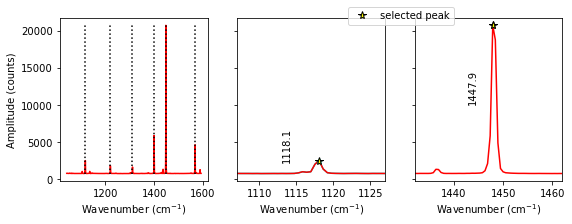

In [27]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=line_1 # approximate position of the 1st line you are interested in
peak2_cent=line_2 # Approximate position of the 2nd line you are interested in


Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=spectra_path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## You can tweak parameters here
- The default parameters may work, you can see what those are here:
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min) if you are fitting the 1117 line as you need 2 peaks
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override
- See figure from Penny for what these parameters actually are

In [28]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [29]:
Ne_Config=pf.Ne_peak_config(pk1_amplitude=40, pk2_amplitude=100, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk2_baseline=2 )
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=2, lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=40, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

filename  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  error_pk2  \
0  01 NE 1.txt    1448.112703   28949.692829   0.243239   0.243239    0.00347   

   pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  error_pk1     deltaNe  \
0    1117.908142    2544.066868   0.280778   0.280778        NaN  330.204562   

    Ne_Corr  Ne_Corr_min  Ne_Corr_max  residual_pk2  residual_pk1  \
0  1.000827          NaN          NaN    116.807733     20.642341   

   residual_pk1+pk2  
0        137.450074

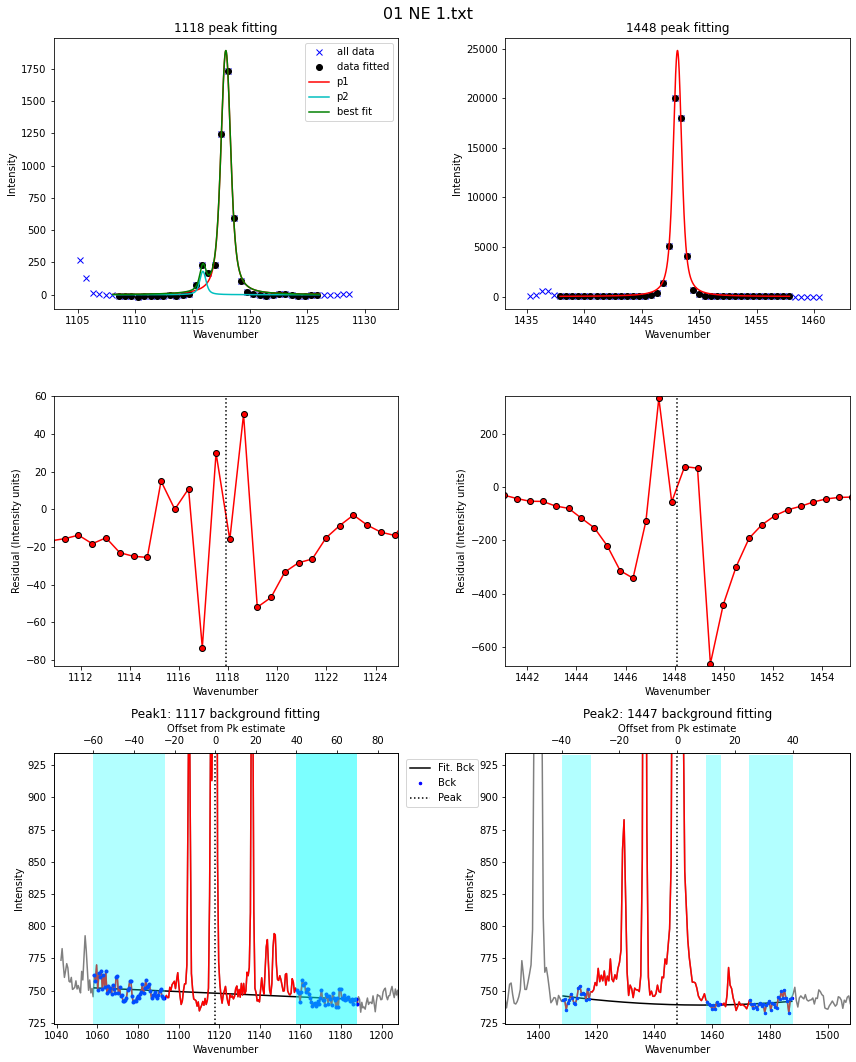

In [30]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=spectra_path, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
display(df_test)

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [31]:
len(Ne_files)

36

 56%|███████████████████████▉                   | 20/36 [00:14<00:12,  1.32it/s]/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/ne_lines.py:916: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ((ax3, ax2), (ax5, ax4), (ax1, ax0)) = plt.subplots(3,2, figsize = (12,15)) # adjust dimensions of figure here
100%|███████████████████████████████████████████| 36/36 [00:27<00:00,  1.33it/s]


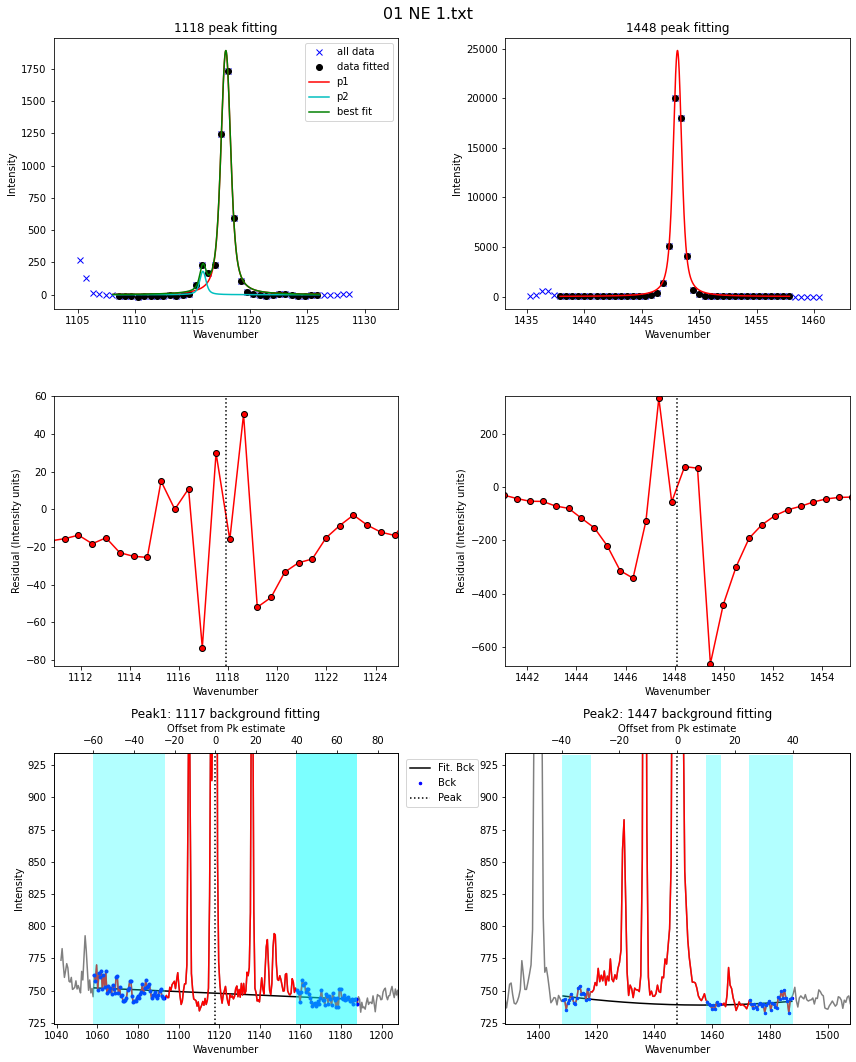

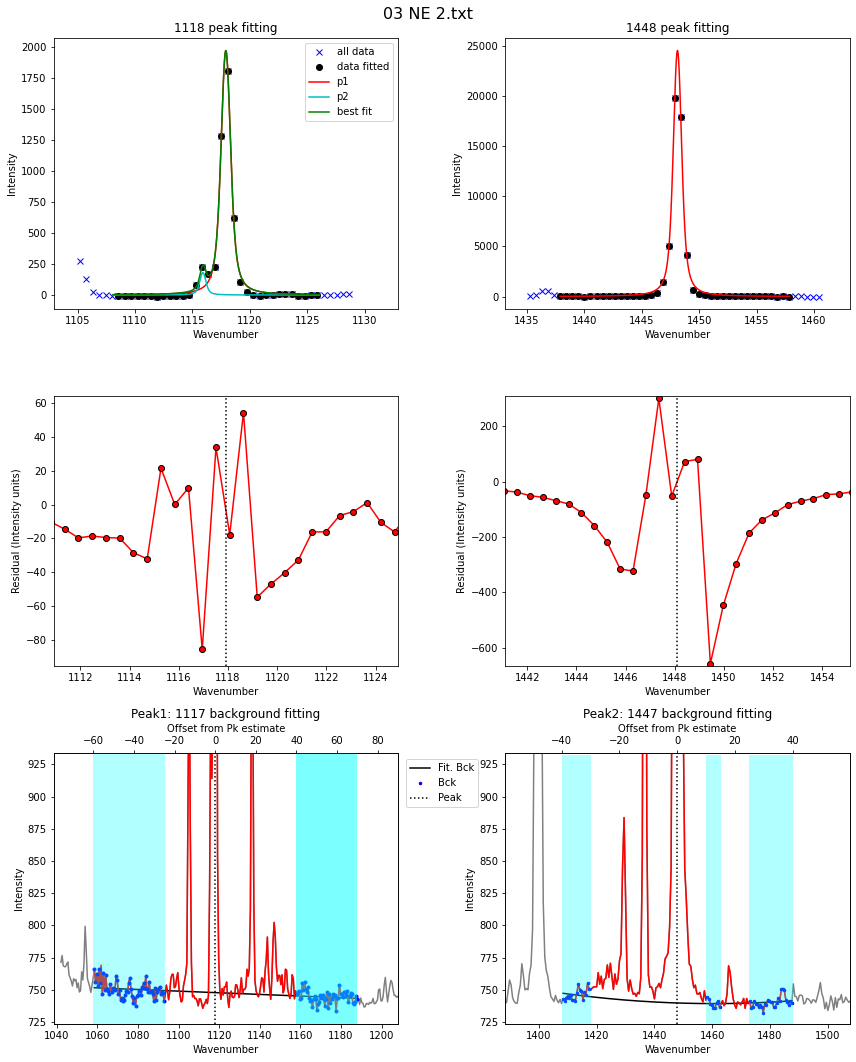

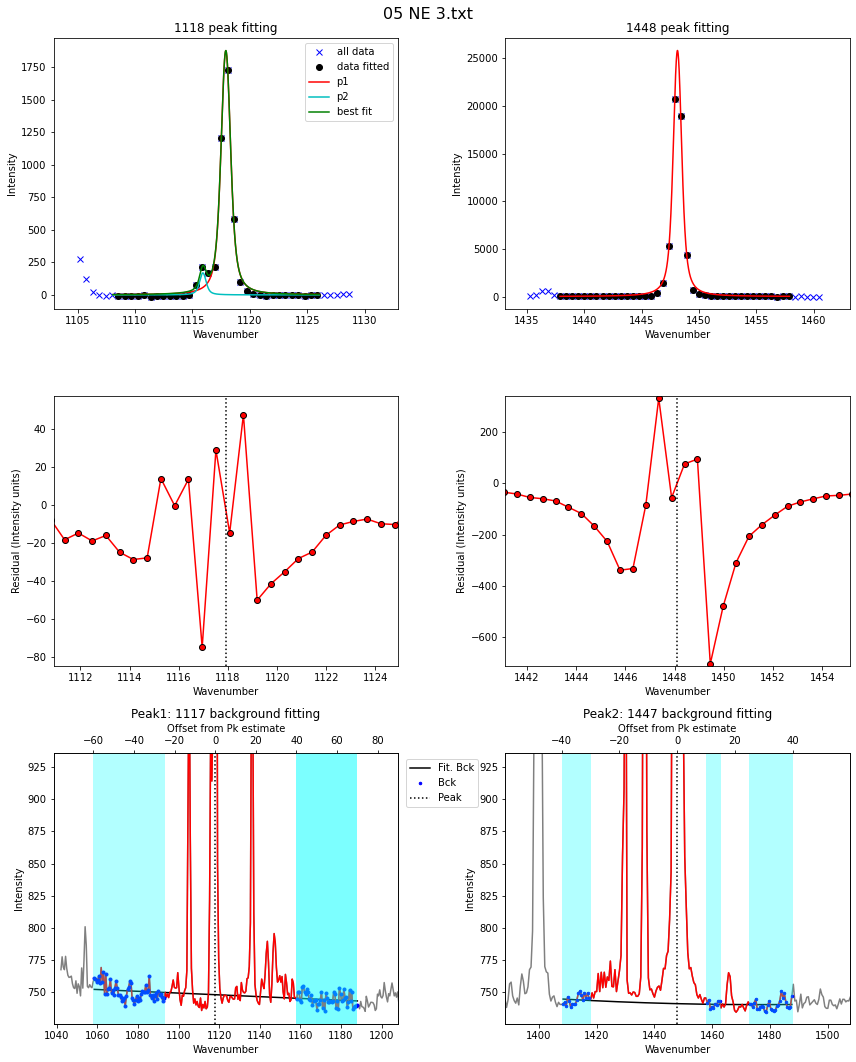

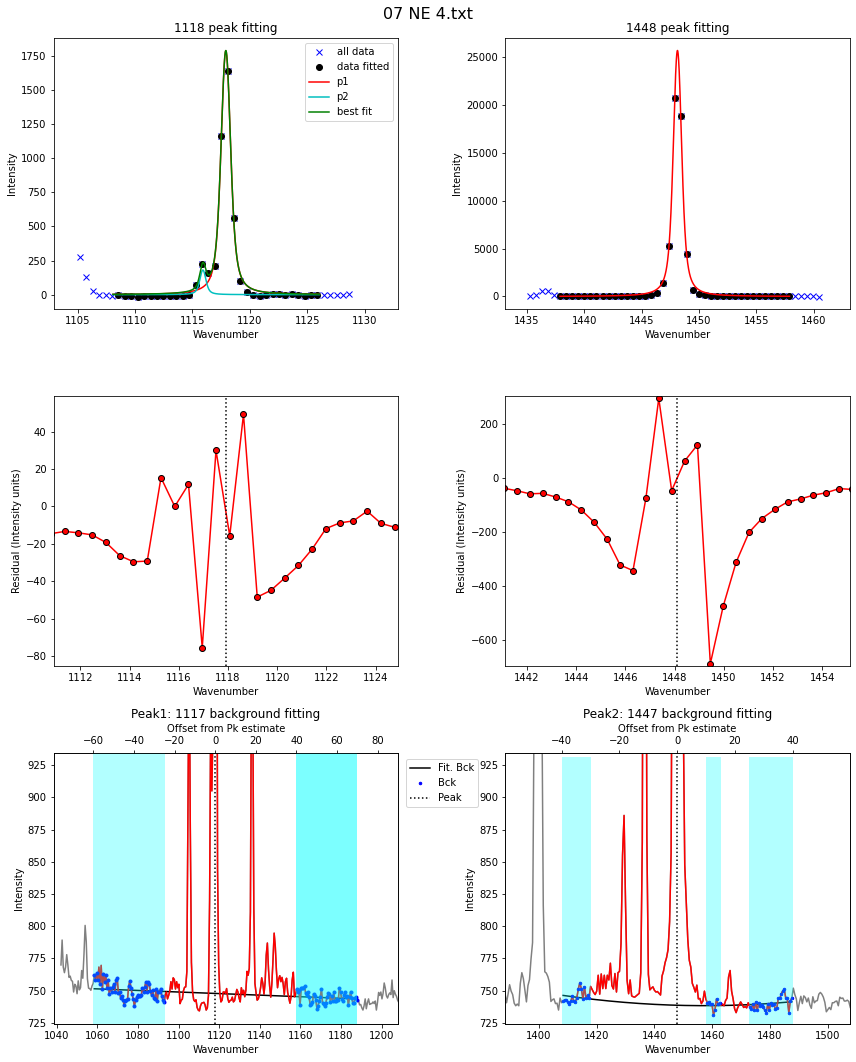

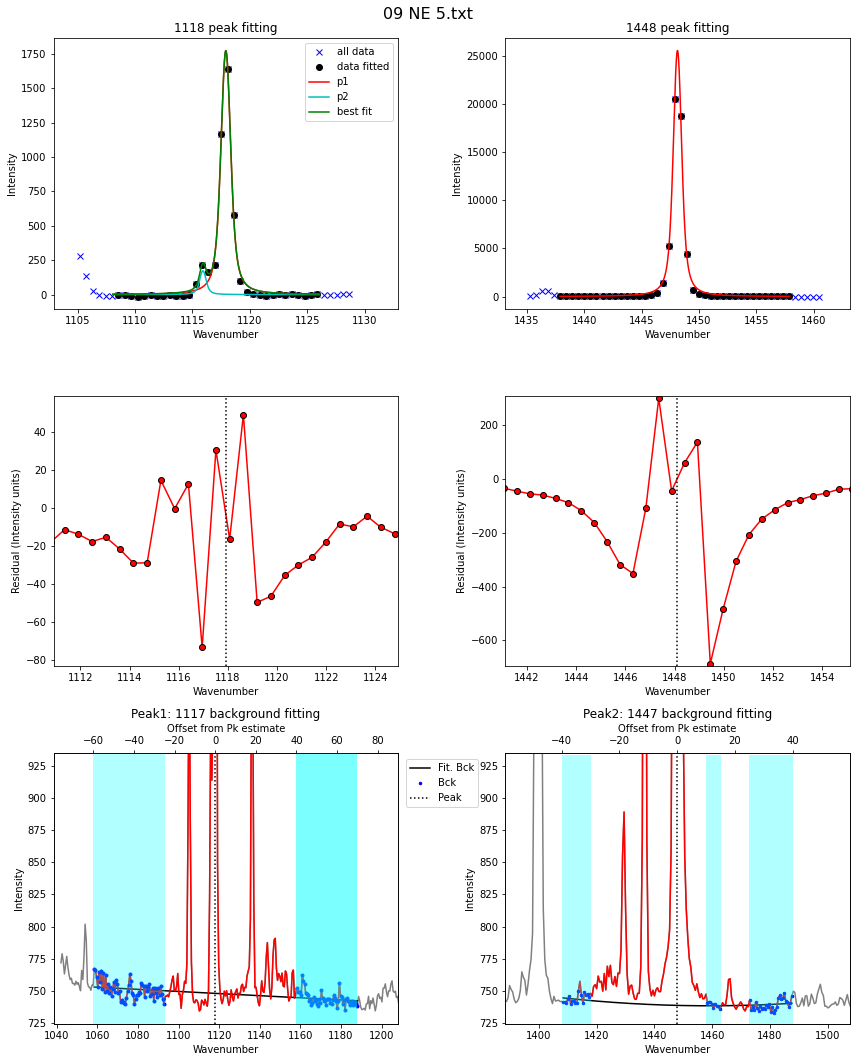

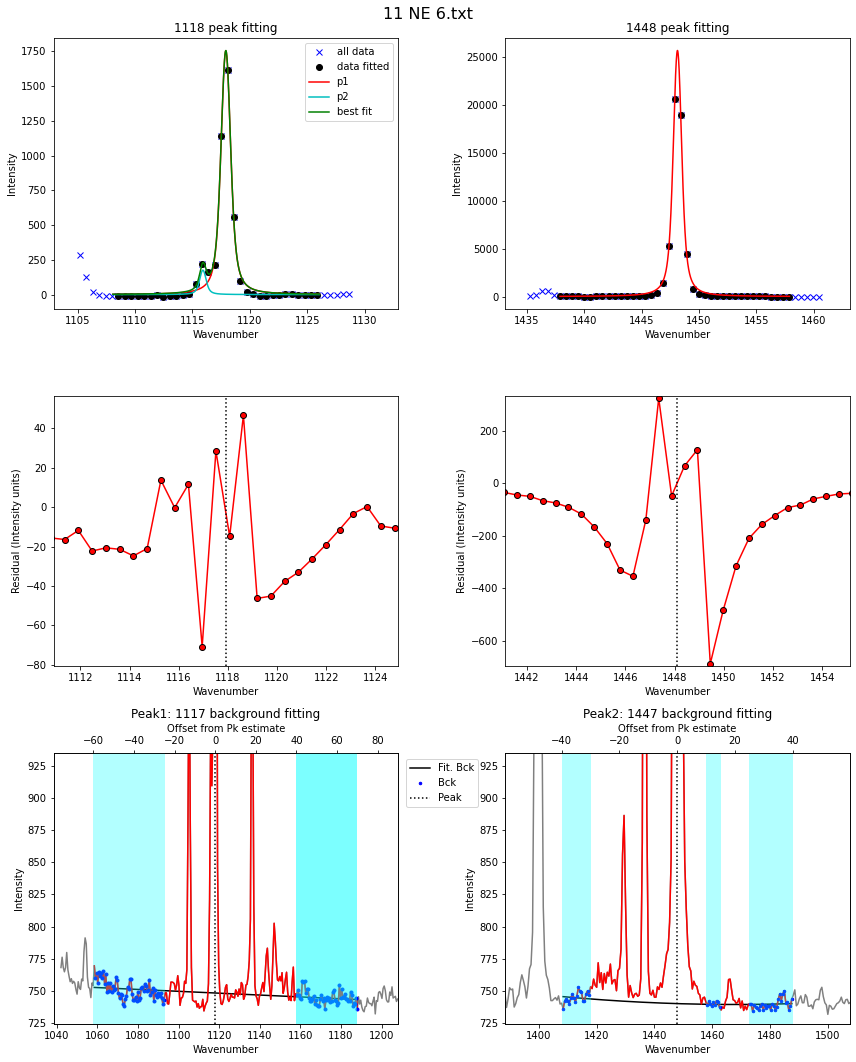

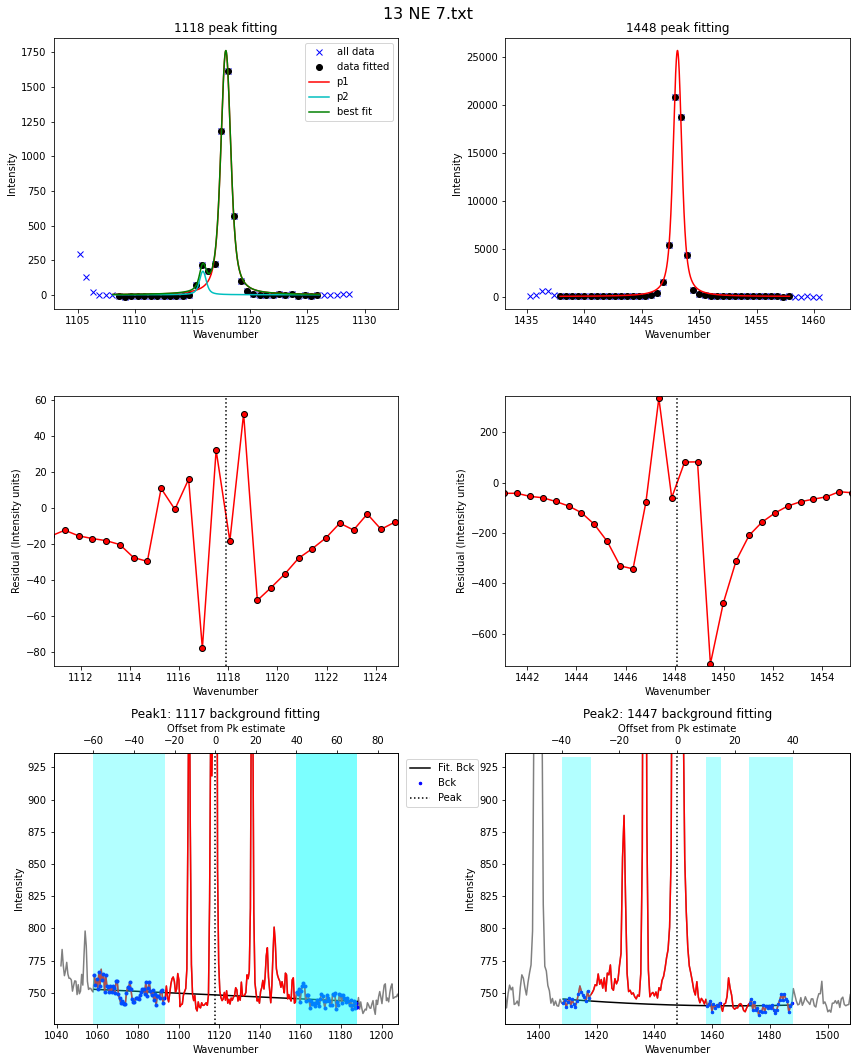

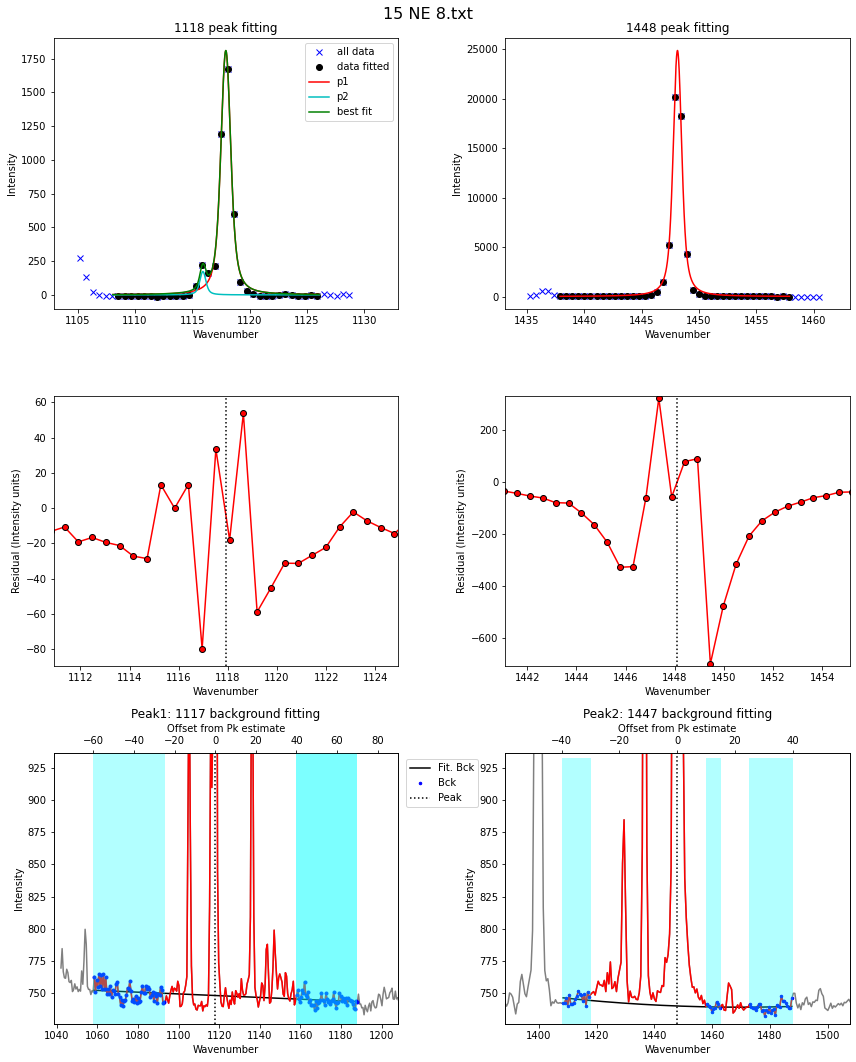

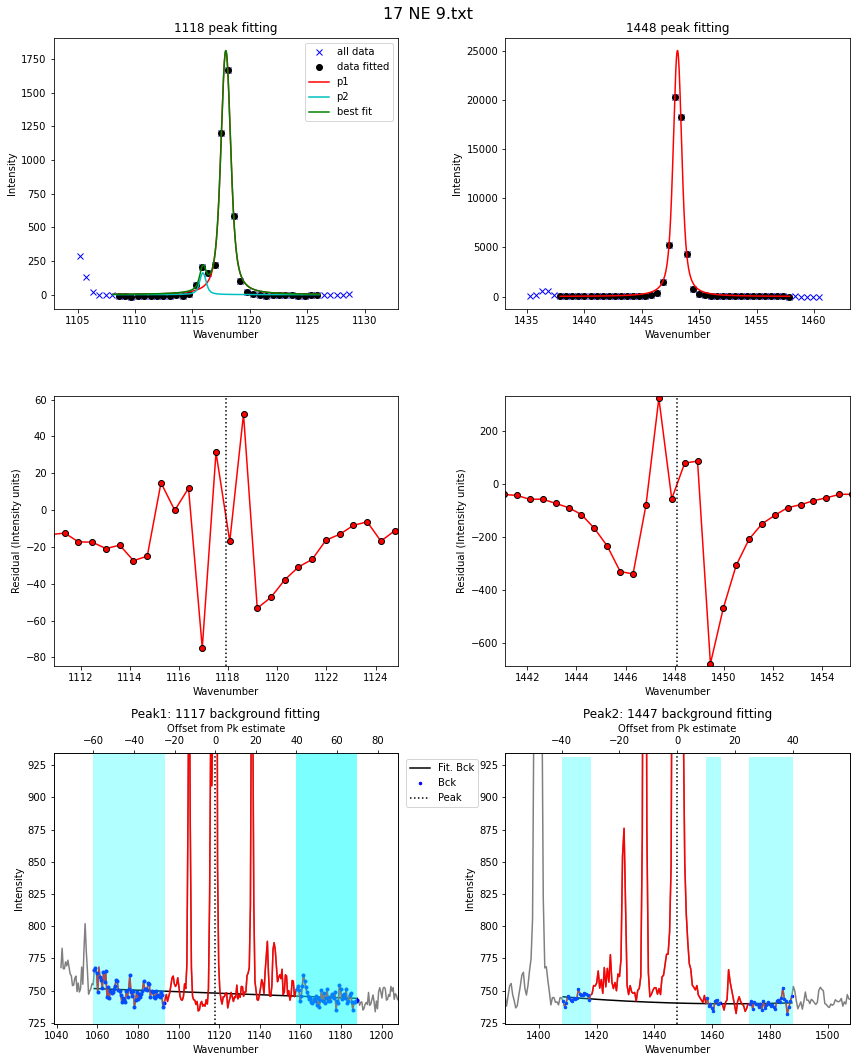

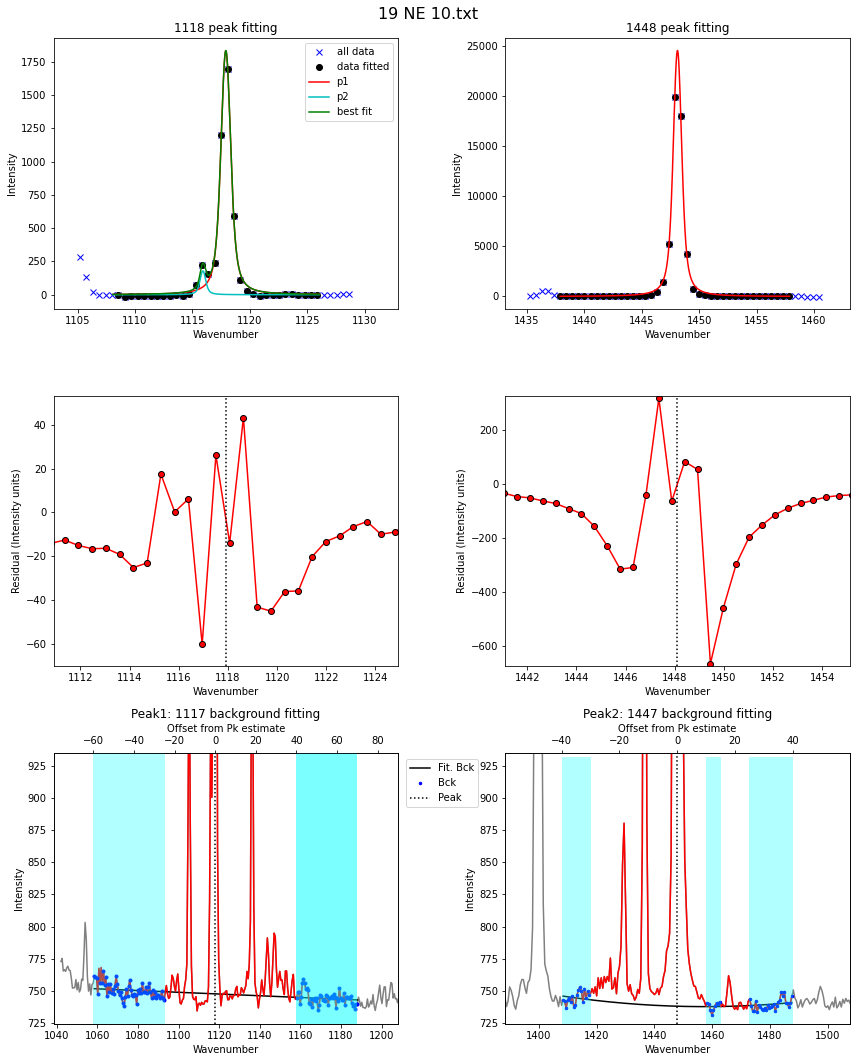

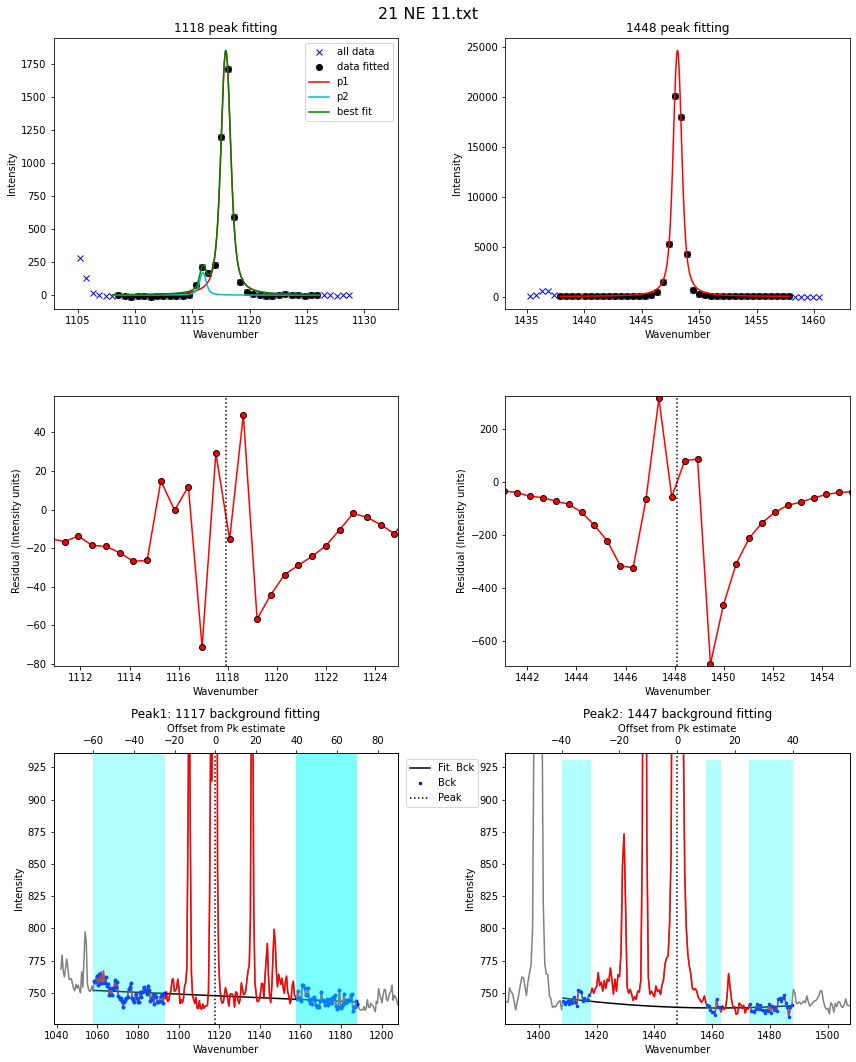

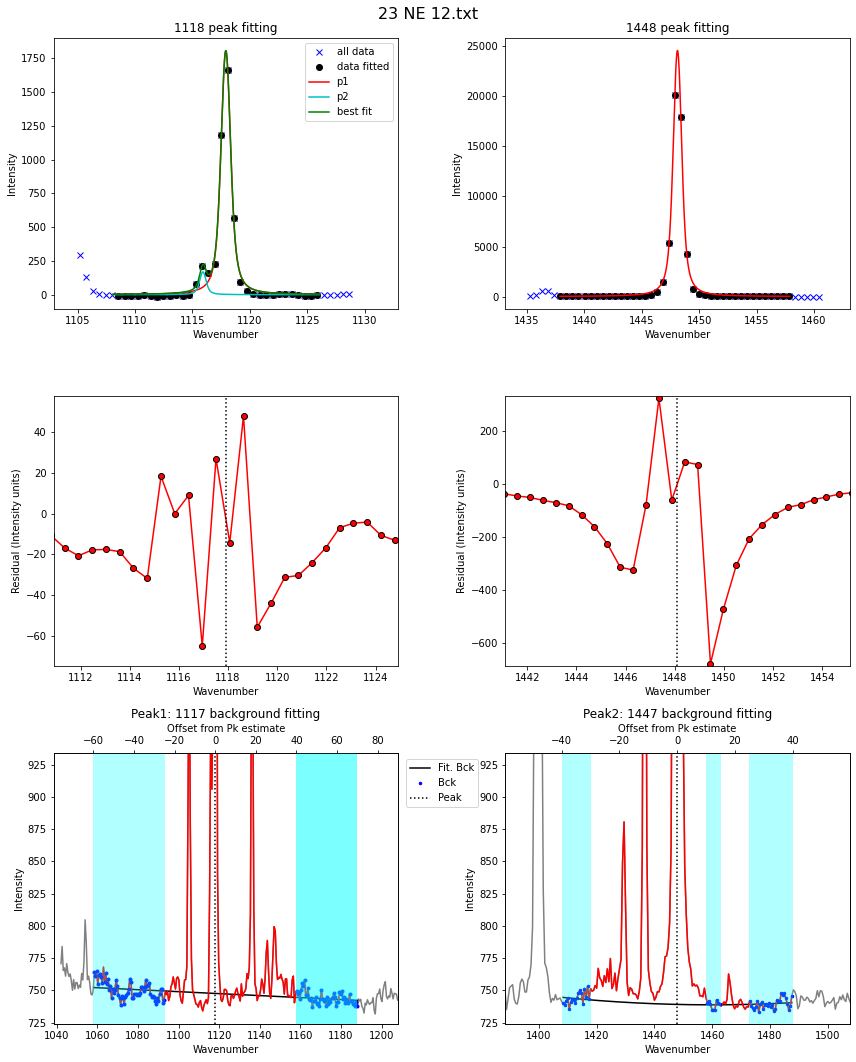

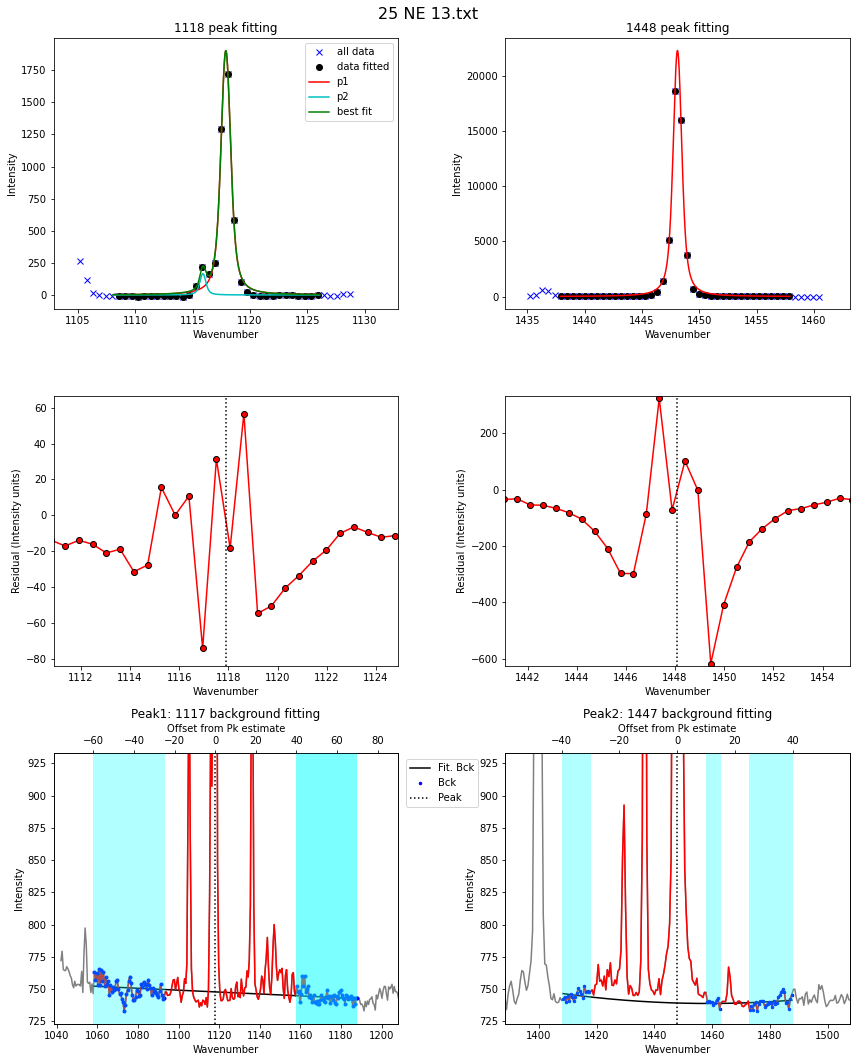

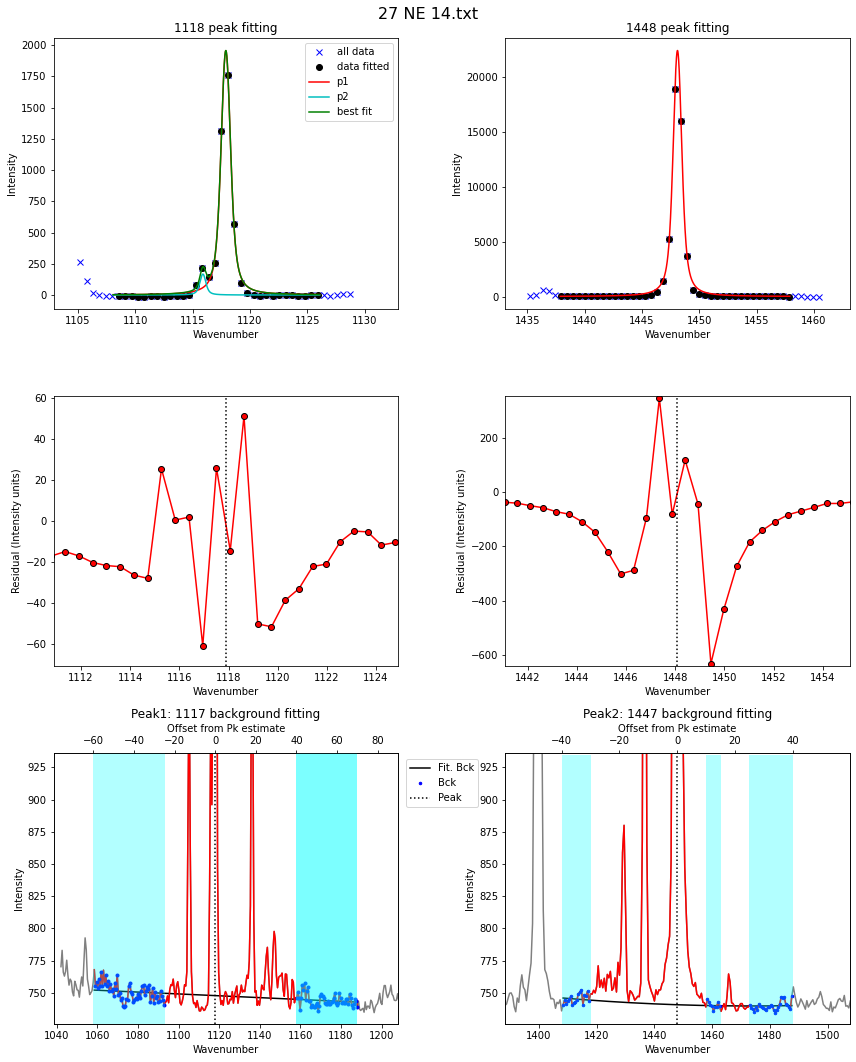

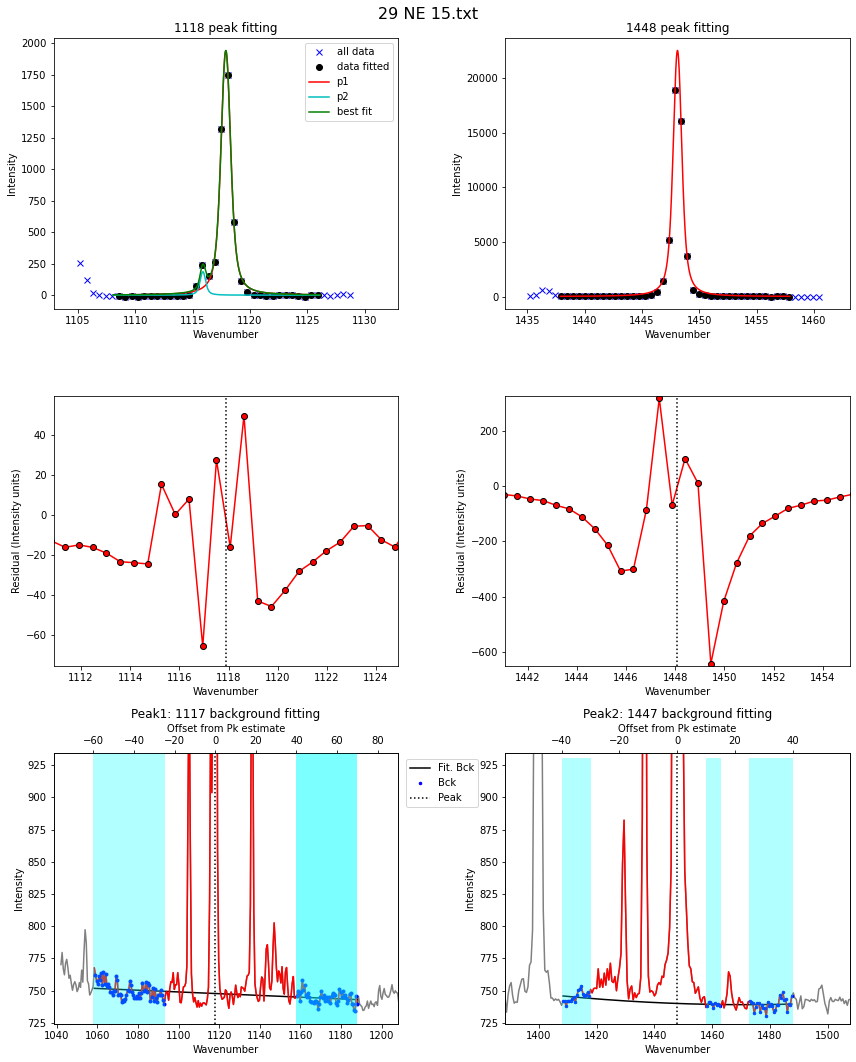

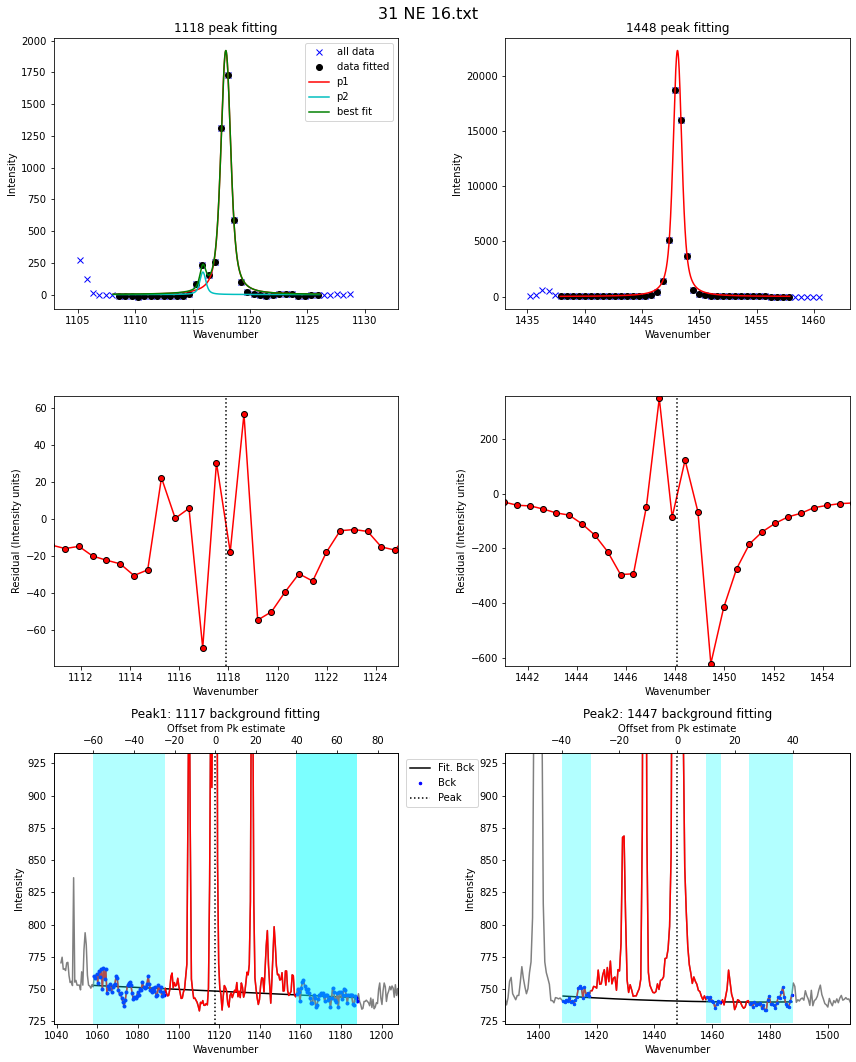

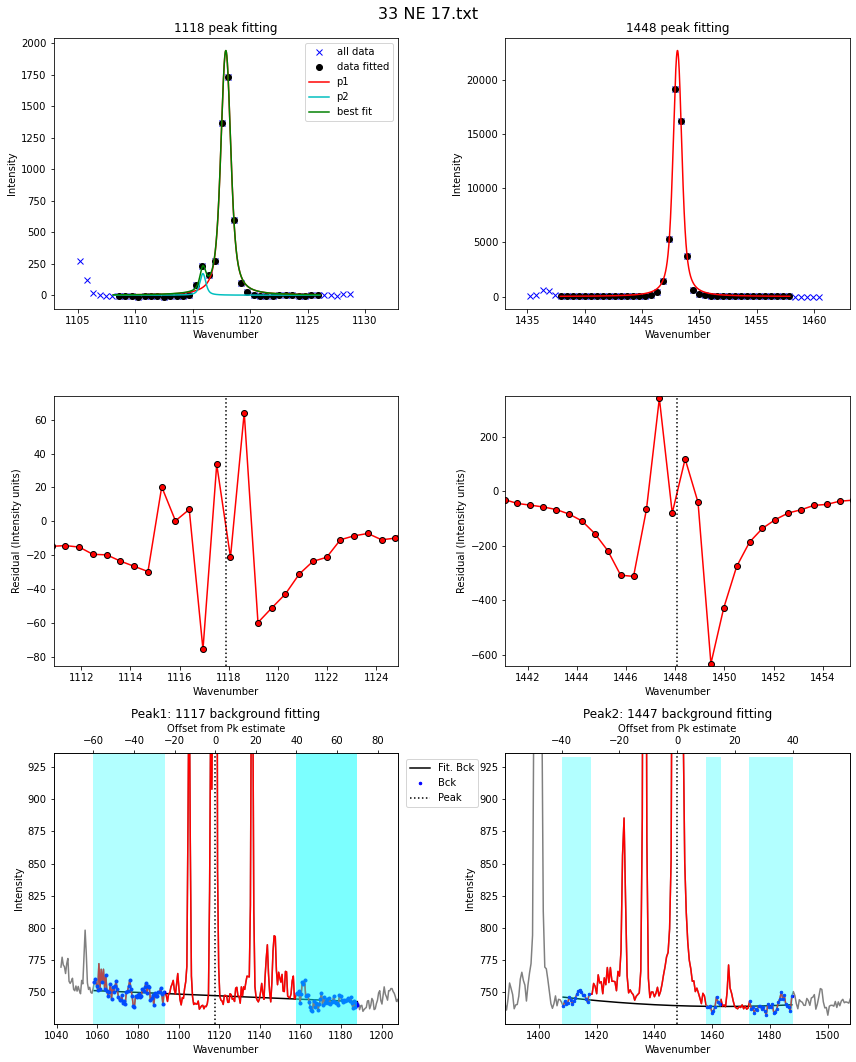

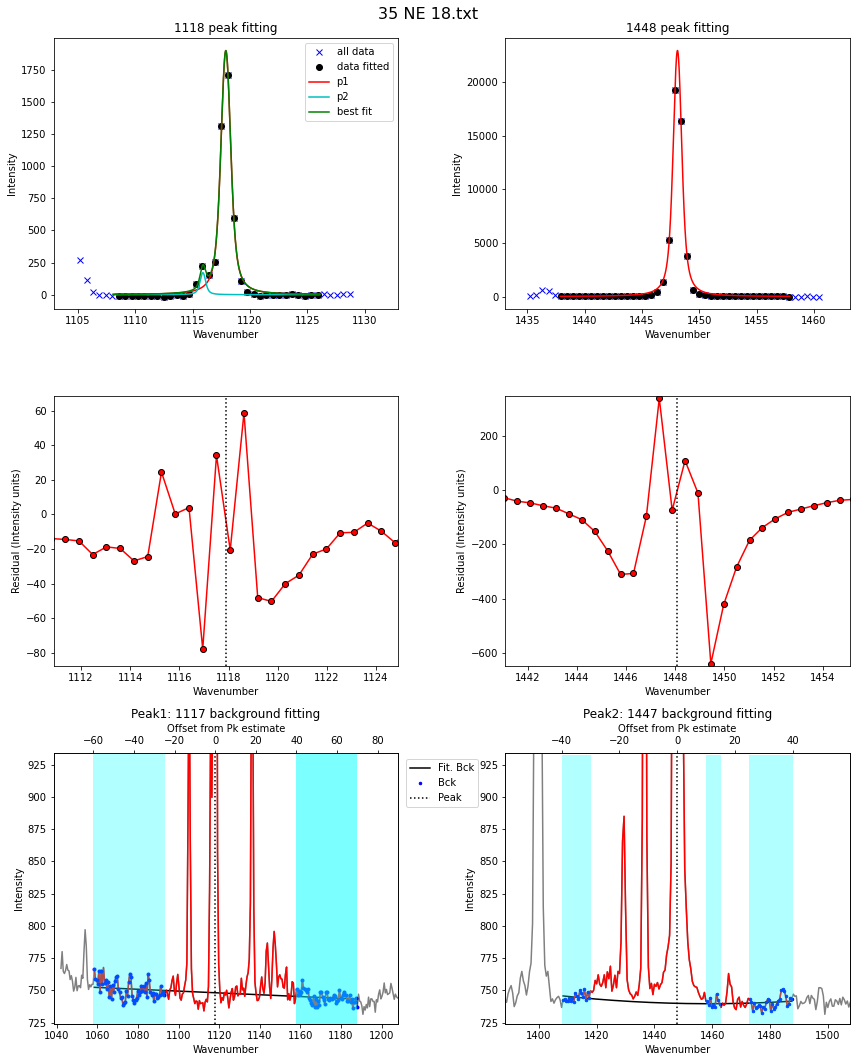

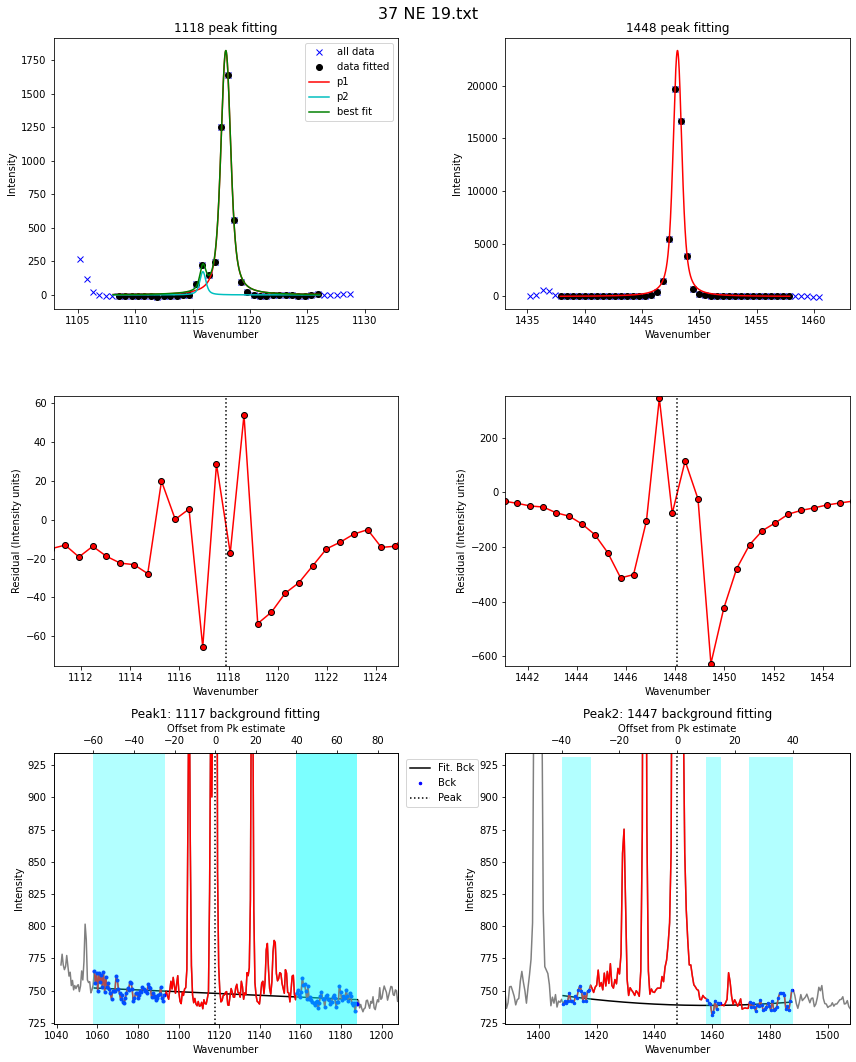

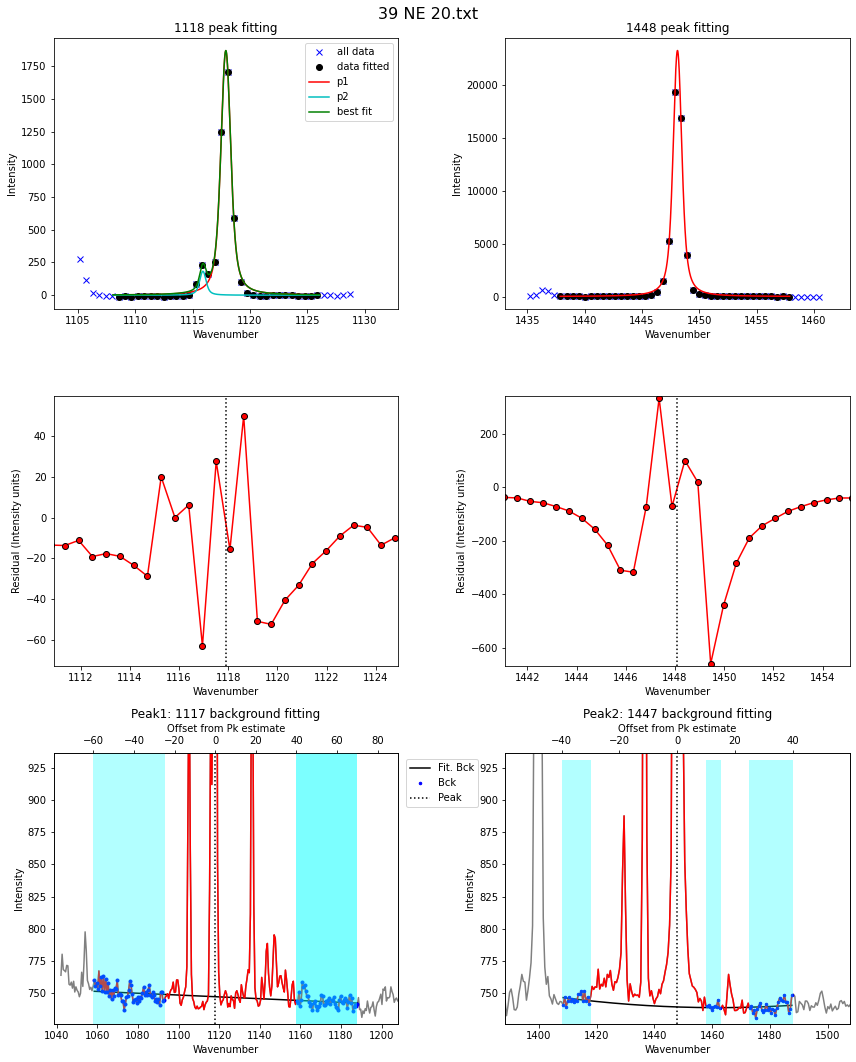

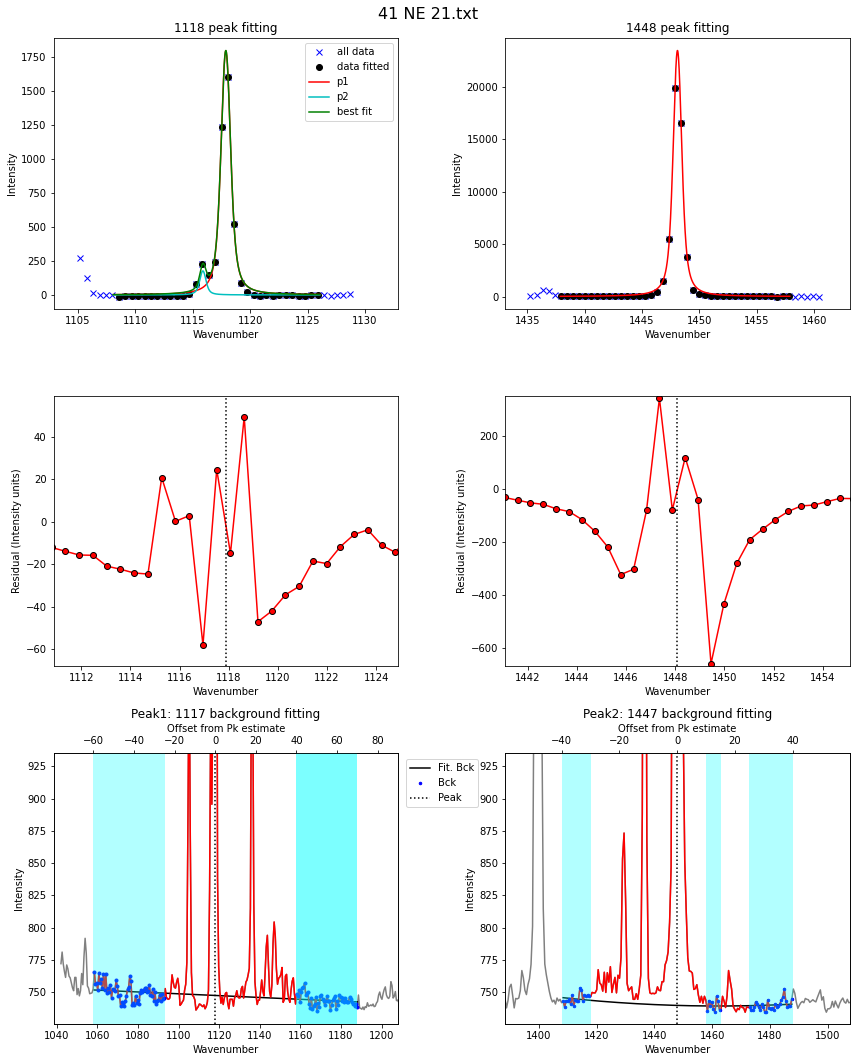

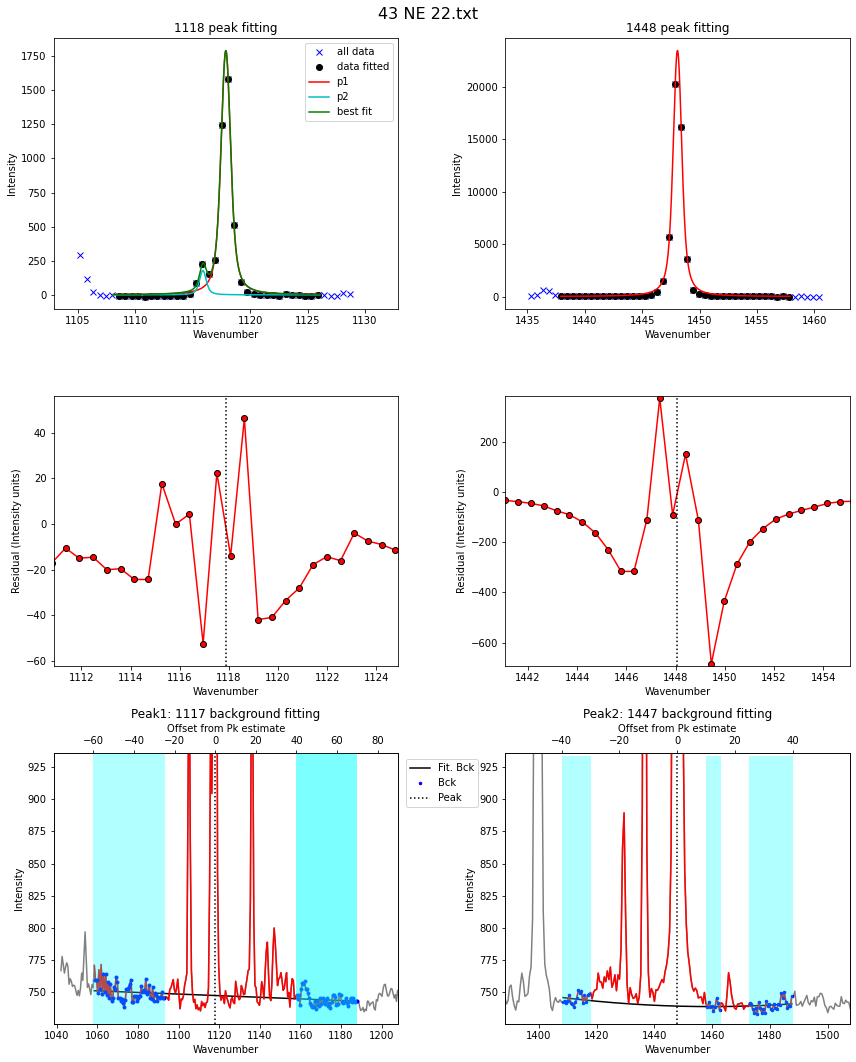

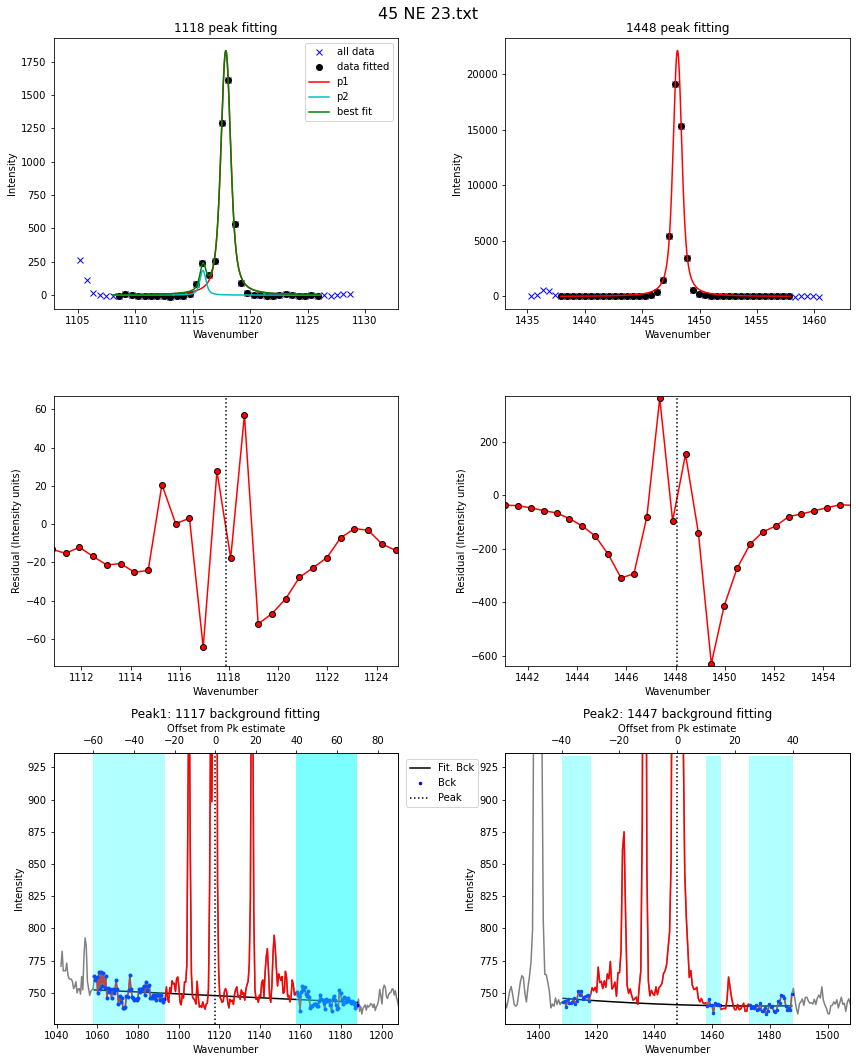

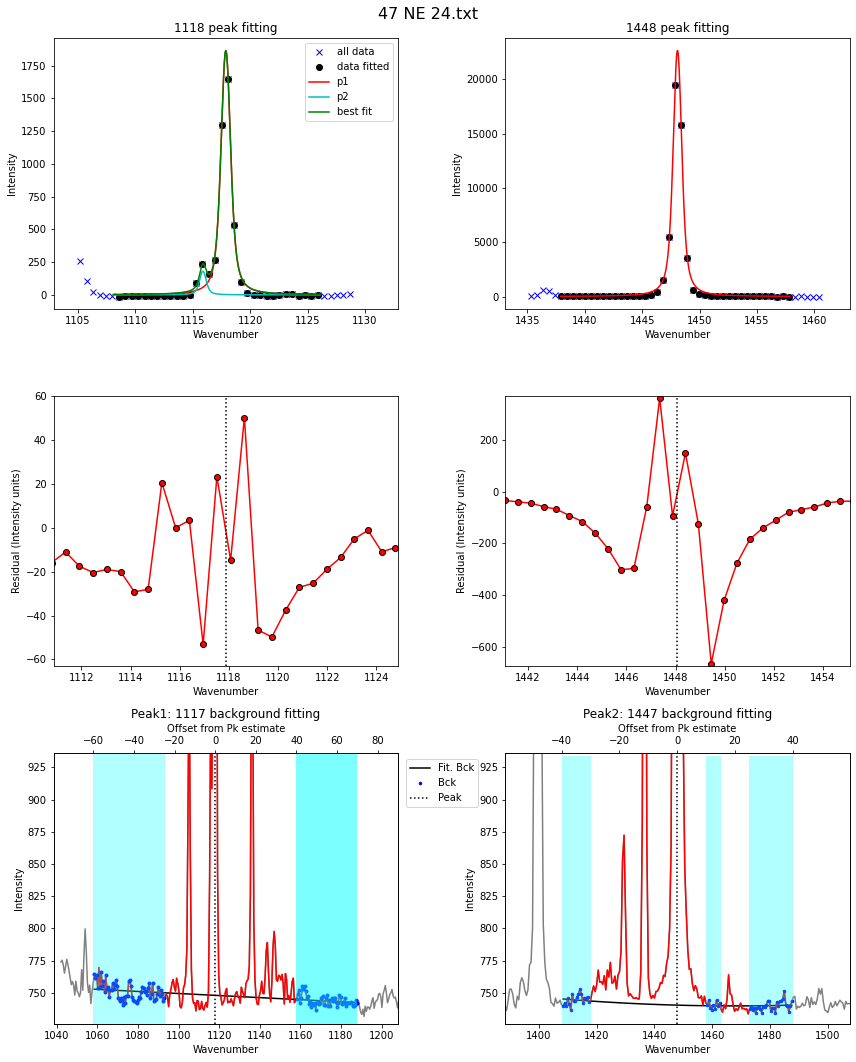

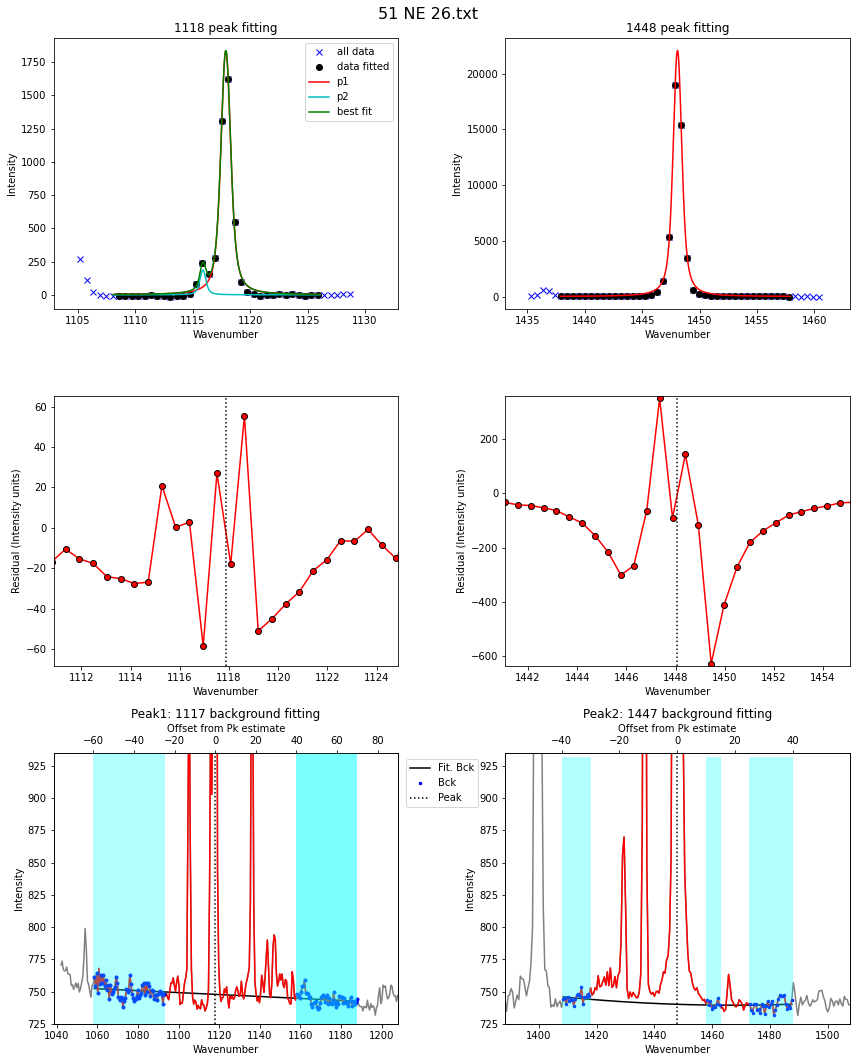

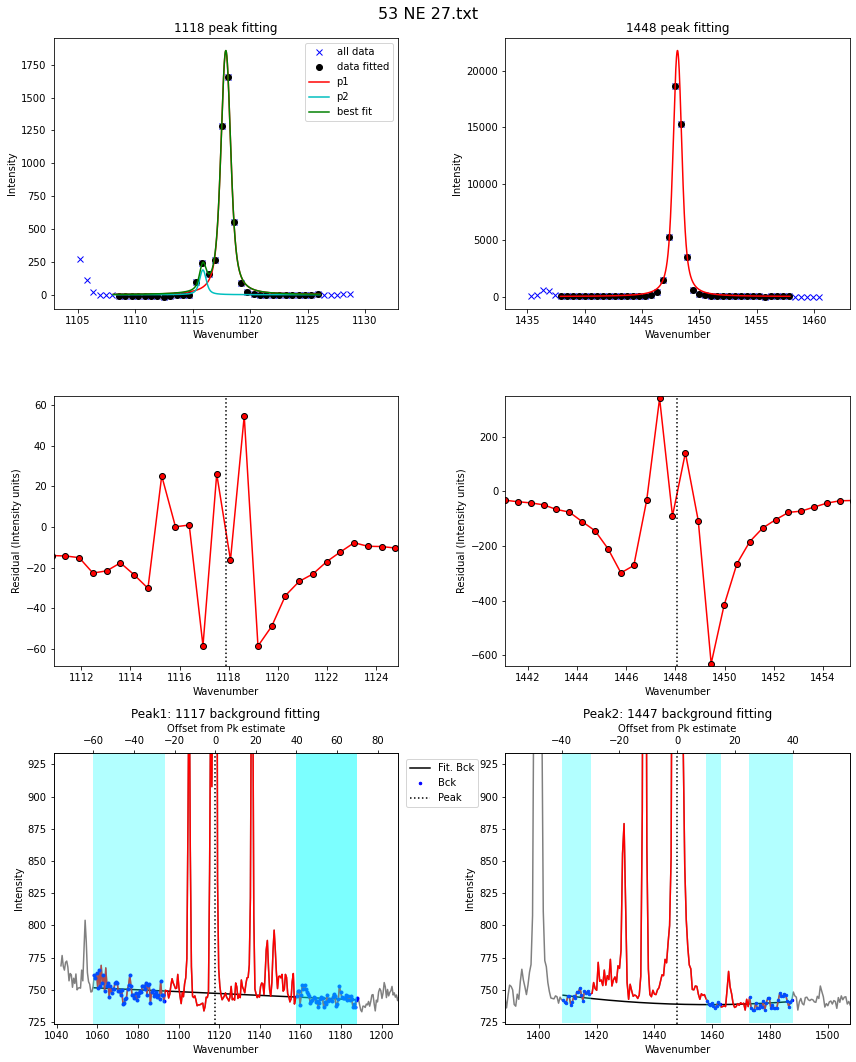

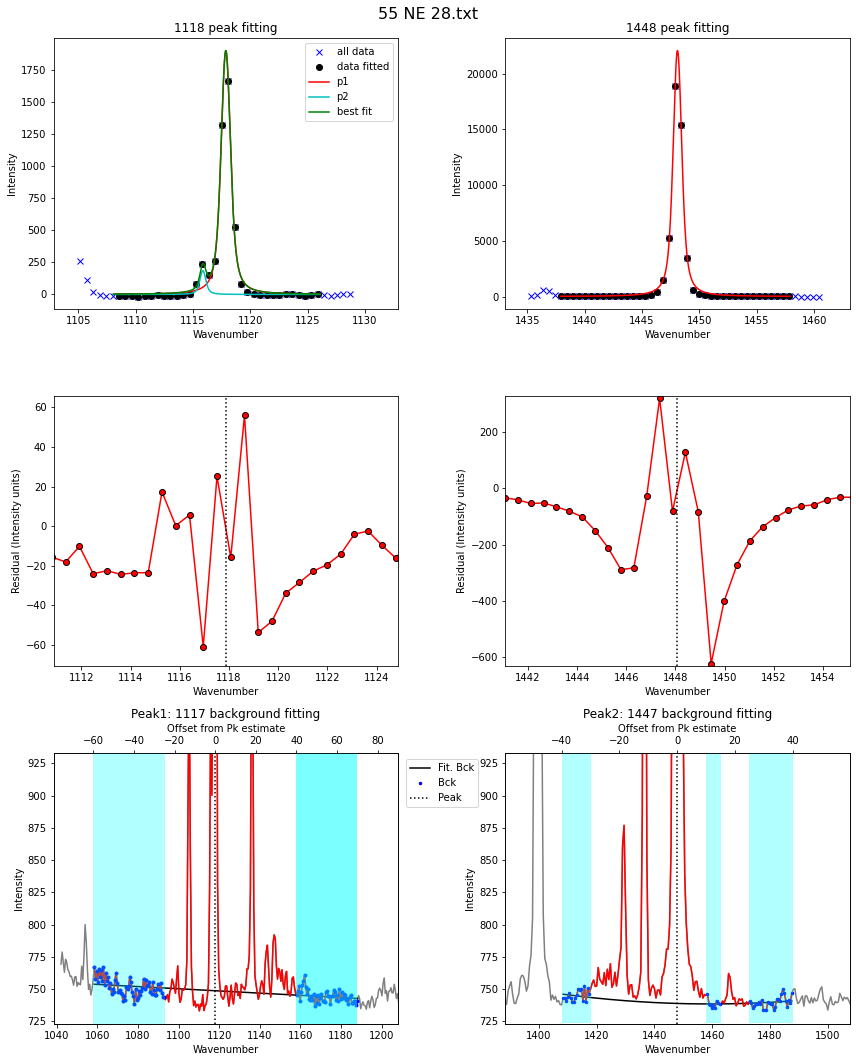

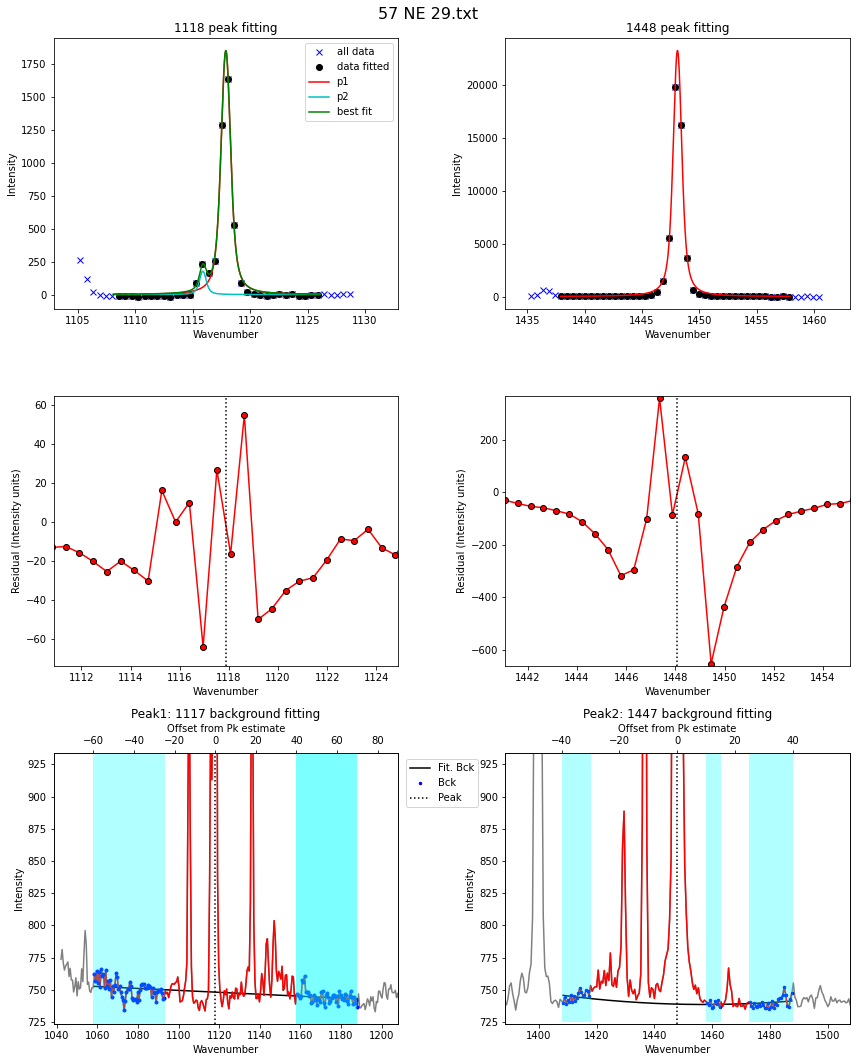

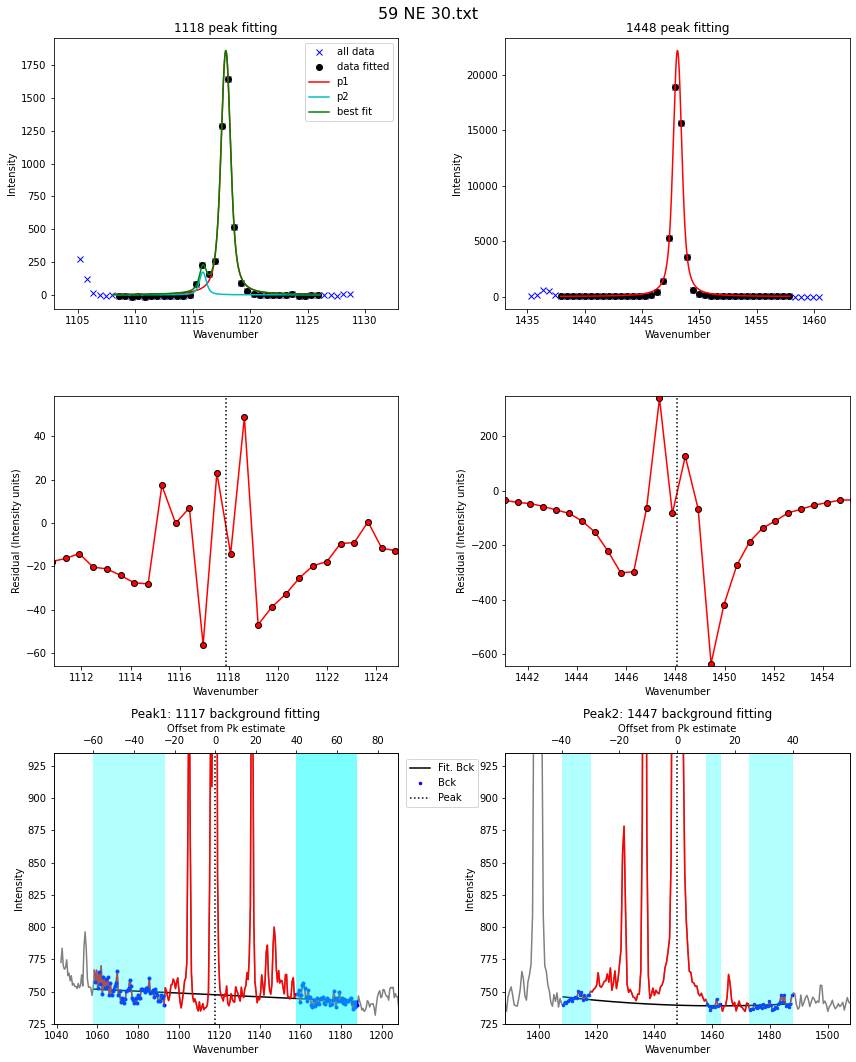

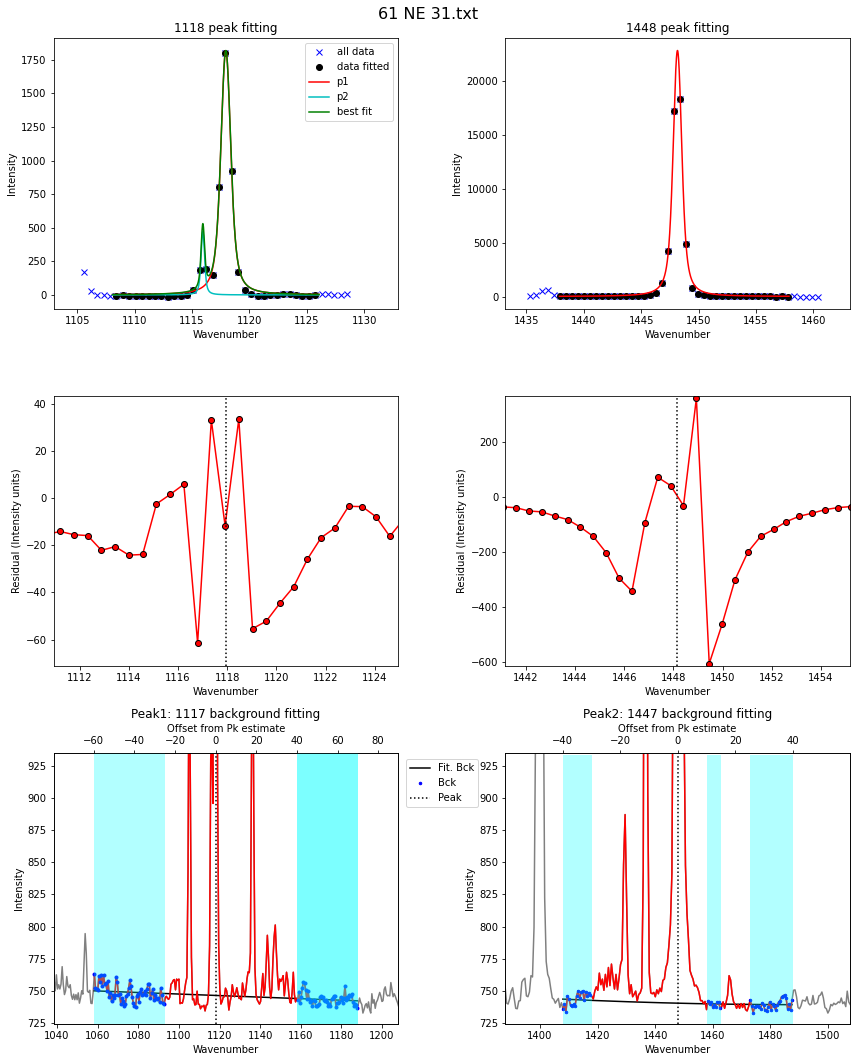

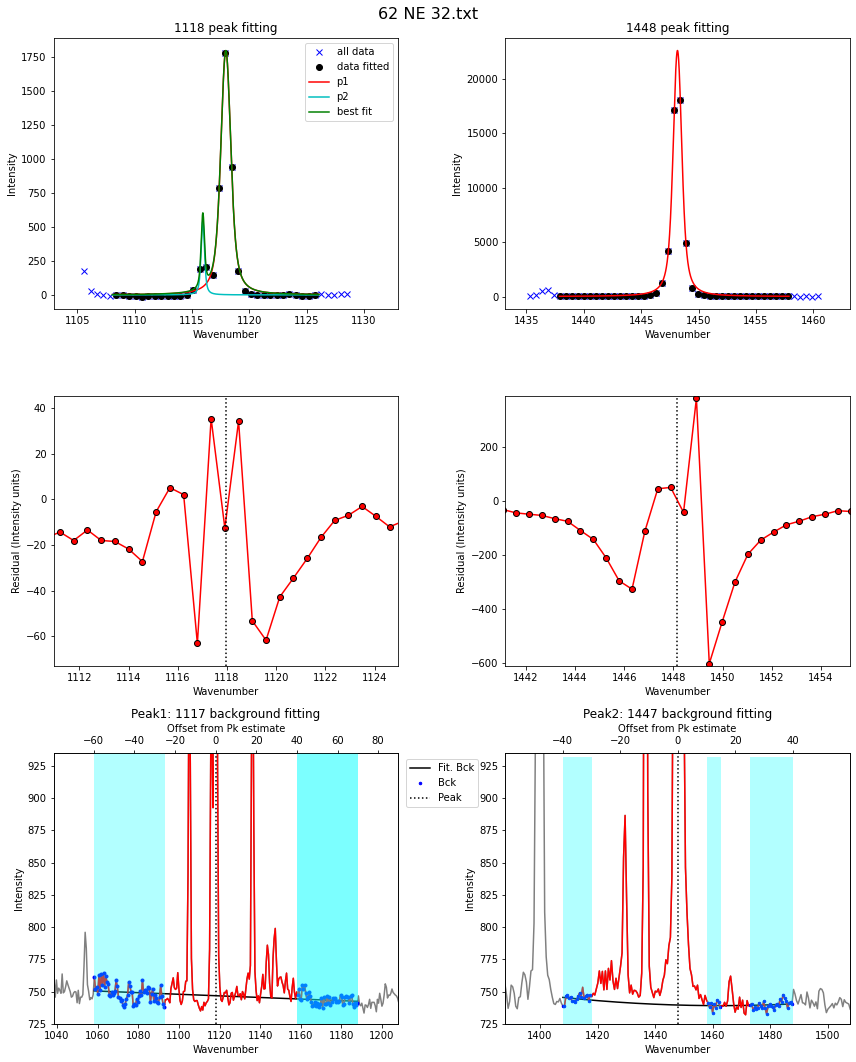

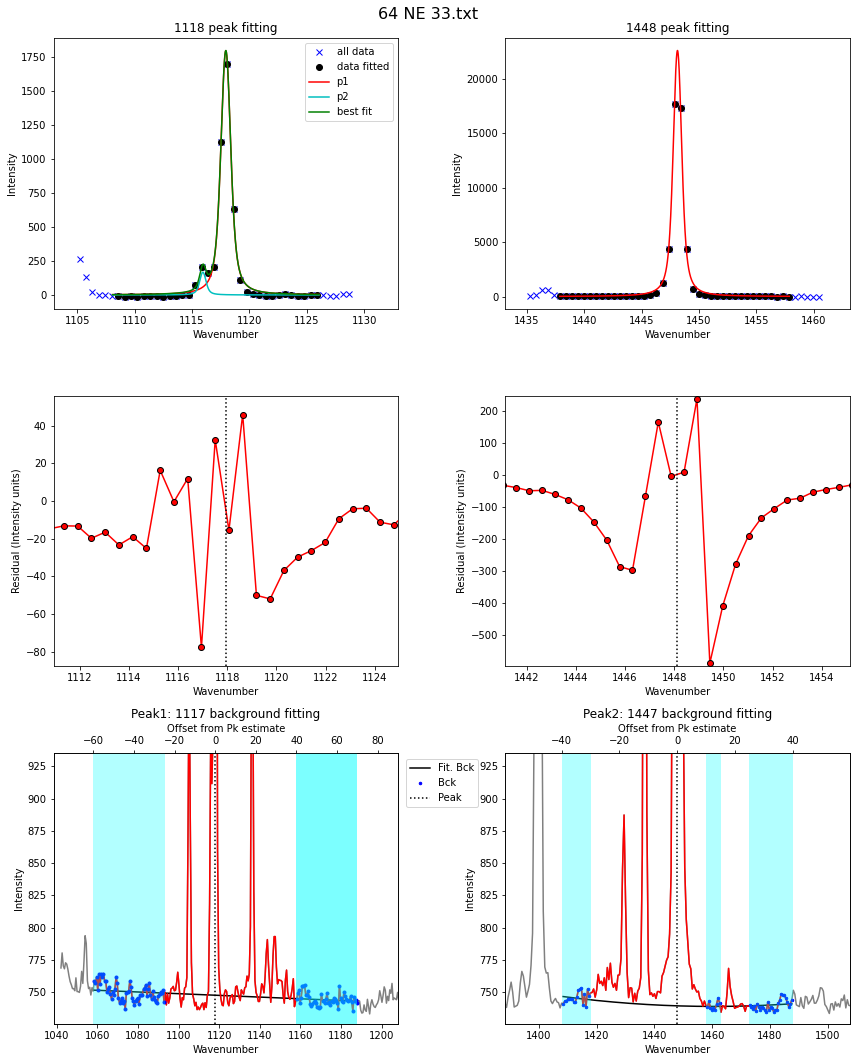

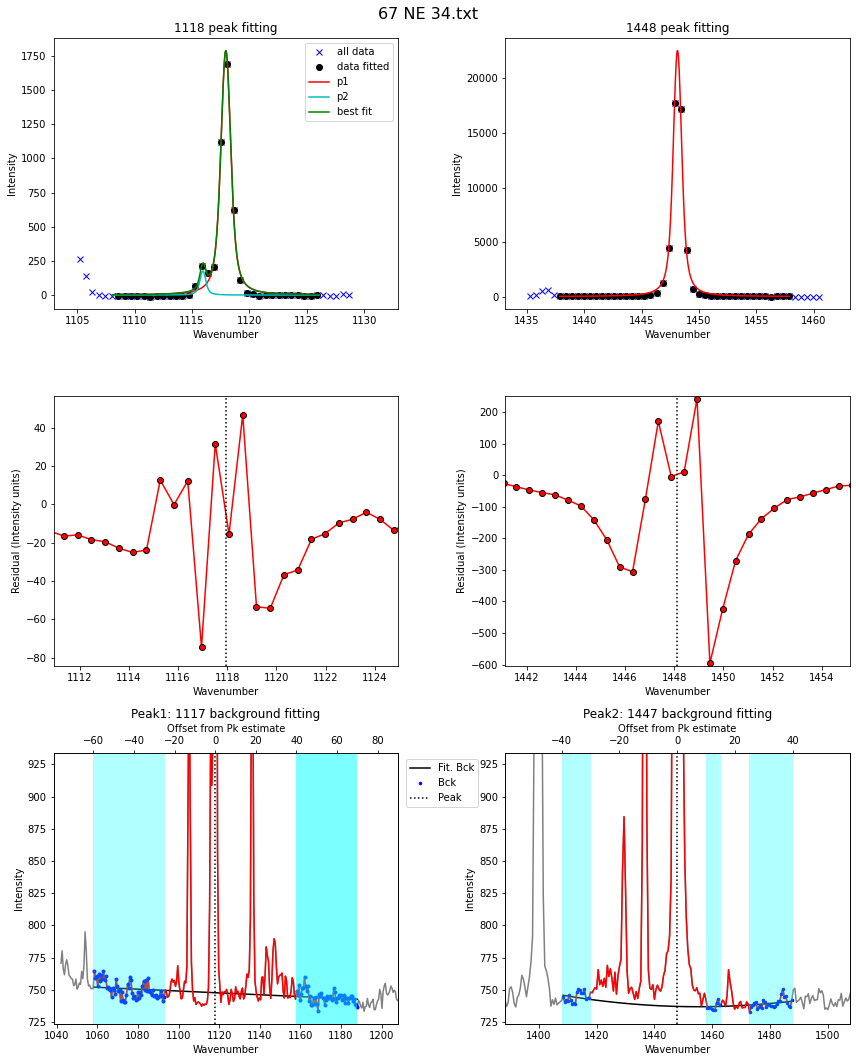

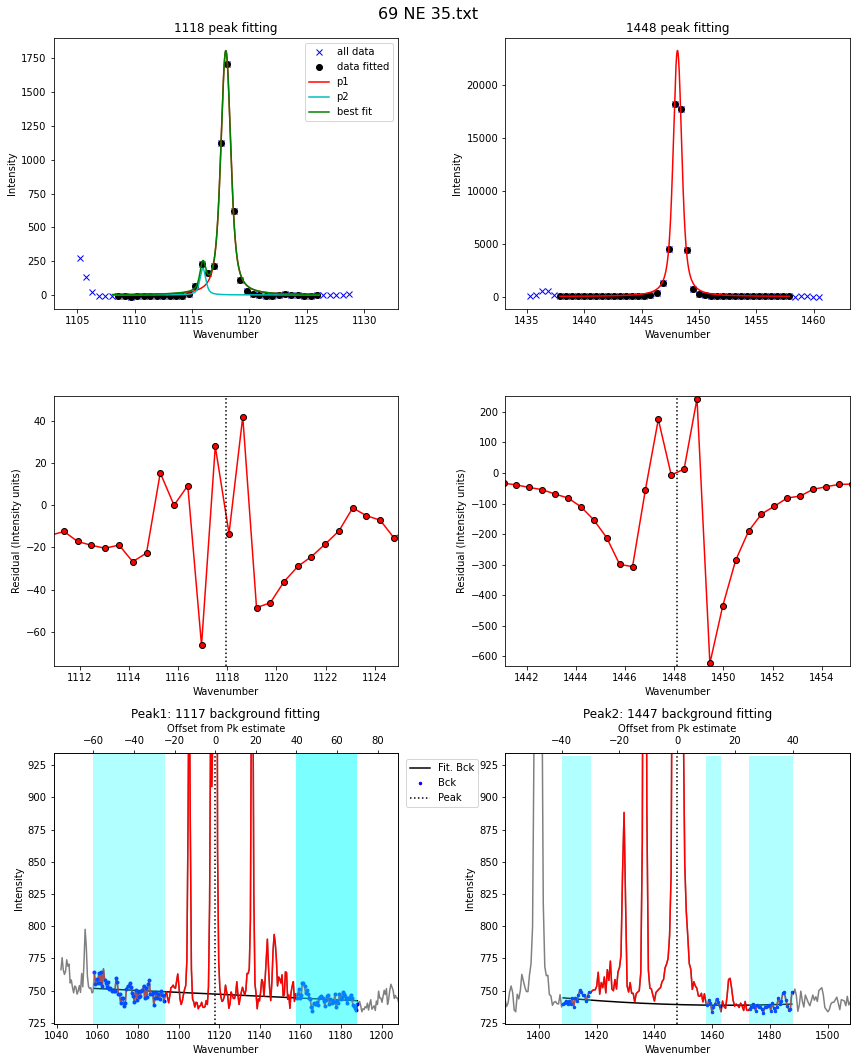

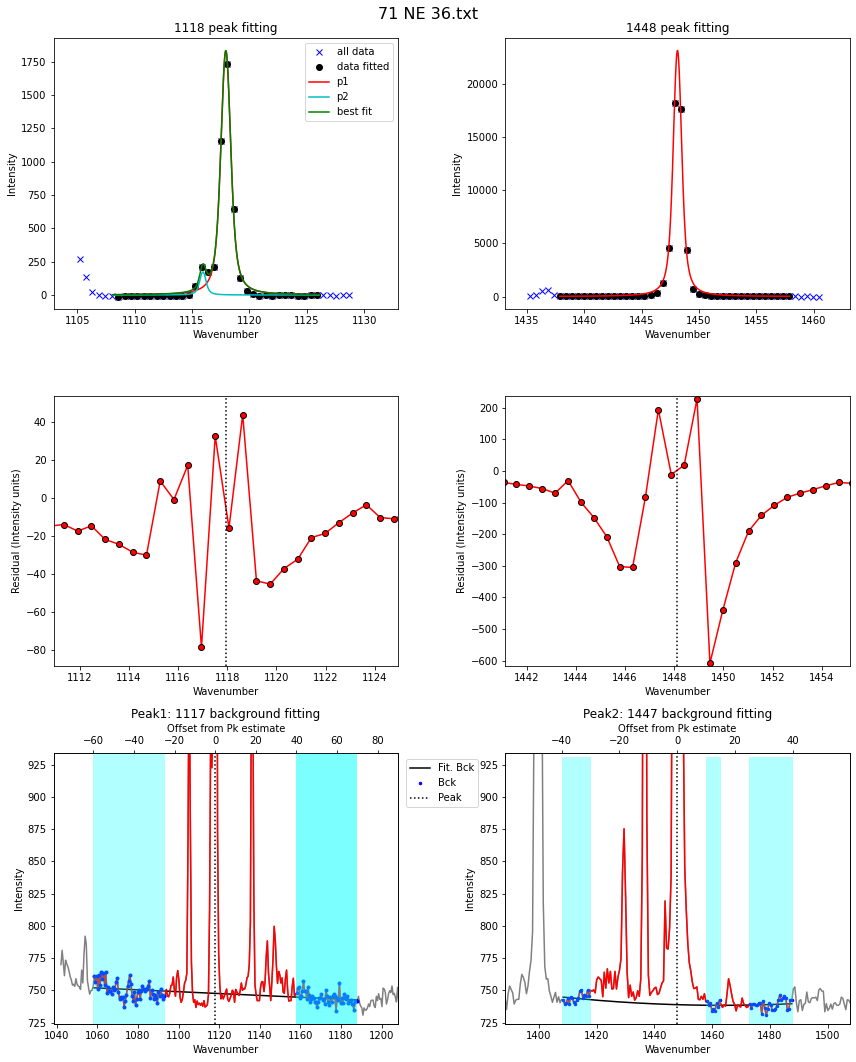

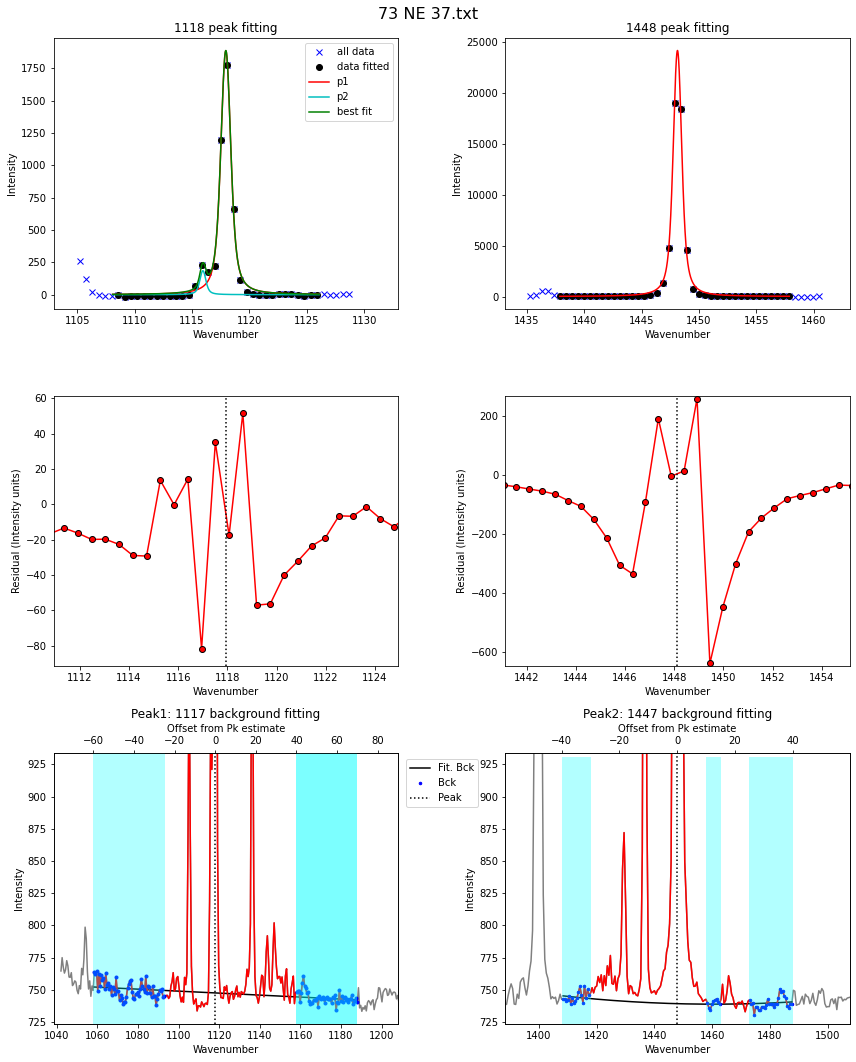

In [32]:
df2=pf.loop_Ne_lines(files=Ne_files, path=spectra_path, filetype=filetype,
                  config=Ne_Config, peaks_1=2, Ne=Ne, Ne_center_1=nearest_pk1,
                  Ne_center_2=nearest_pk2, DeltaNe_ideal=ideal_split['Ne_Split'], 
                  plot_figure=True, save_clipboard=True, single_acq=False)

# If any are weird, can fit again here
- If you refit, you'll have to replace the value in the saved dataframe

In [33]:
# # Which file
# filename2=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 

# # Tweak fit

# Ne_Config2=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
# lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
# lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
# x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
# Ne_Config

# # You also need to set whether you want 1 peak or 2 for the LH diad
# peaks_1=2

# df_test=pf.fit_Ne_lines(  
#     config=Ne_Config2, peaks_1=peaks_1,
#     Ne=Ne, filename=filename2, path=spectra_path, prefix=prefix,
#     Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
#     DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
# #config: Ne_peak_config=Ne_peak_config(),

## Stitching meta data with Ne line data

In [34]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][0])

NE 1.txt


In [35]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_type='.txt')

file_m

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7', 'NE 8',
       'NE 9', 'NE 10', 'NE 11', 'NE 12', 'NE 13', 'NE 14', 'NE 15',
       'NE 16', 'NE 17', 'NE 18', 'NE 19', 'NE 20', 'NE 21', 'NE 22',
       'NE 23', 'NE 24', 'NE 25', 'NE 26', 'NE 27', 'NE 28', 'NE 29',
       'NE 30', 'NE 31', 'NE 32', 'NE 33', 'NE 34', 'NE 35', 'NE 36',
       'NE 37'], dtype=object)

In [36]:
type(file_m)

numpy.ndarray

In [37]:
# See what file names you have for your actual datafiles
print(df2['filename'][0])

01 NE 1.txt


In [38]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7', 'NE 8',
       'NE 9', 'NE 10', 'NE 11', 'NE 12', 'NE 13', 'NE 14', 'NE 15',
       'NE 16', 'NE 17', 'NE 18', 'NE 19', 'NE 20', 'NE 21', 'NE 22',
       'NE 23', 'NE 24', 'NE 26', 'NE 27', 'NE 28', 'NE 29', 'NE 30',
       'NE 31', 'NE 32', 'NE 33', 'NE 34', 'NE 35', 'NE 36', 'NE 37'],
      dtype=object)

## Now combining them

In [39]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect what our Ne correction factors actually look like

In [40]:
help(pf.plot_Ne_corrections)

Help on function plot_Ne_corrections in module DiadFit.ne_lines:

plot_Ne_corrections(df=None, x_axis=None, x_label='index', marker='o', mec='k', mfc='r')
    ## Plot to help inspect which Ne lines to discard



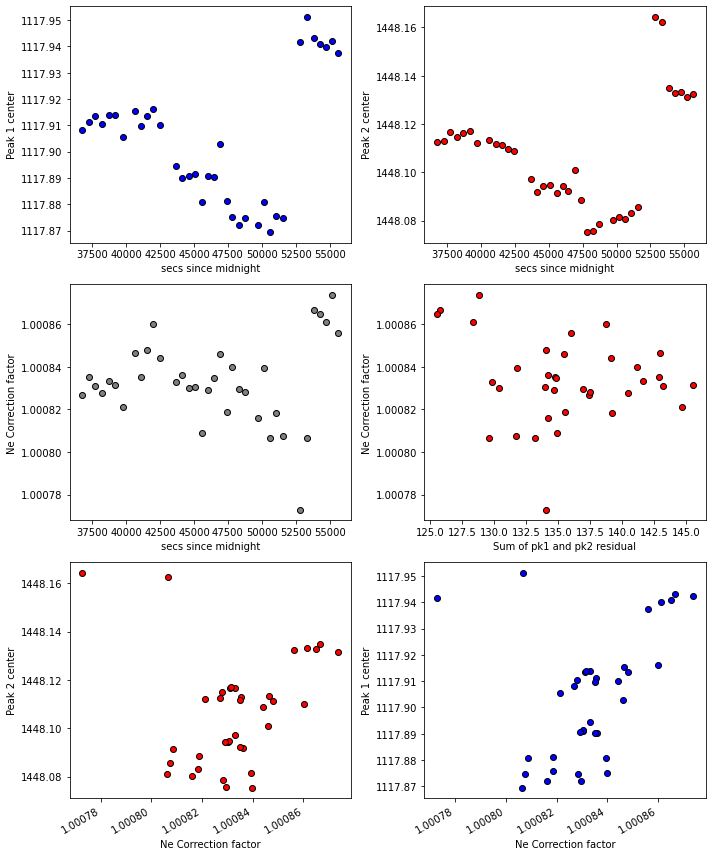

In [41]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')

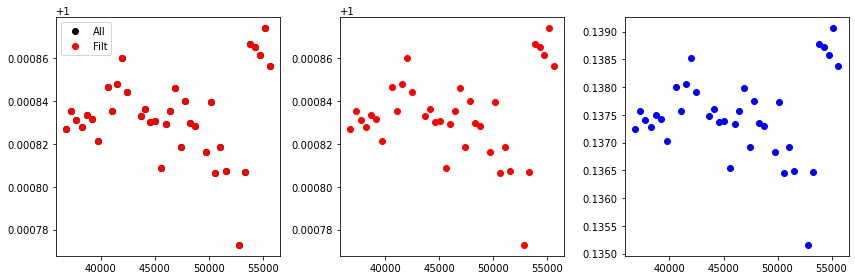

In [42]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], number_av=5, offset=0.0001)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')
fig.tight_layout()

In [43]:
df_combo.to_excel('Ne Lines 09.16.22.xlsx')

In [45]:
df_combo

filename_x  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  \
0    01 NE 1.txt    1448.112703   28949.692829   0.243239   0.243239   
1    03 NE 2.txt    1448.112873   28712.145536   0.244357   0.244357   
2    05 NE 3.txt    1448.116812   30236.345572   0.244571   0.244571   
3    07 NE 4.txt    1448.114795   30052.341865   0.244600   0.244600   
4    09 NE 5.txt    1448.116494   30037.923267   0.245014   0.245014   
5    11 NE 6.txt    1448.116994   30253.498994   0.245501   0.245501   
6    13 NE 7.txt    1448.112126   30174.528587   0.245579   0.245579   
7    15 NE 8.txt    1448.113431   29430.917758   0.246704   0.246704   
8    17 NE 9.txt    1448.111664   29571.064308   0.246731   0.246731   
9   19 NE 10.txt    1448.111280   29084.532365   0.247257   0.247257   
10  21 NE 11.txt    1448.109871   29255.557135   0.247961   0.247961   
11  23 NE 12.txt    1448.108904   29275.474333   0.248441   0.248441   
12  25 NE 13.txt    1448.097228   26837.457519   0.251041   0.251041   
13  27 NE 14.txt    1448.091709   26950.349053   0.251347   0.251347   
14  29 NE 15.txt    1448.094359   27058.085589   0.250545   0.250545   
15  31 NE 16.txt    1448.094718   26773.047663   0.250864   0.250864   
16  33 NE 17.txt    1448.091457   27398.495663   0.251467   0.251467   
17  35 NE 18.txt    1448.094440   27530.655018   0.250642   0.250642   
18  37 NE 19.txt    1448.092132   28132.794229   0.251763   0.251763   
19  39 NE 20.txt    1448.101036   27888.111019   0.250726   0.250726   
20  41 NE 21.txt    1448.088527   28126.573212   0.250016   0.250016   
21  43 NE 22.txt    1448.075404   28187.293788   0.250902   0.250902   
22  45 NE 23.txt    1448.075701   26832.552867   0.252866   0.252866   
23  47 NE 24.txt    1448.078764   27342.560161   0.252047   0.252047   
24  51 NE 26.txt    1448.080085   26679.884020   0.252221   0.252221   
25  53 NE 27.txt    1448.081394   26443.356518   0.253083   0.253083   
26  55 NE 28.txt    1448.080875   26589.201488   0.251404   0.251404   
27  57 NE 29.txt    1448.083030   27967.000285   0.250417   0.250417   
28  59 NE 30.txt    1448.085759   26787.022214   0.251915   0.251915   
29  61 NE 31.txt    1448.164240   27406.145481   0.250401   0.250401   
30  62 NE 32.txt    1448.162410   27238.364496   0.251384   0.251384   
31  64 NE 33.txt    1448.134786   26801.136716   0.247617   0.247617   
32  67 NE 34.txt    1448.132870   26790.073536   0.247757   0.247757   
33  69 NE 35.txt    1448.133225   27519.869560   0.247022   0.247022   
34  71 NE 36.txt    1448.131373   27558.809869   0.247985   0.247985   
35  73 NE 37.txt    1448.132522   28669.004403   0.247380   0.247380   

    error_pk2  pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  ...  \
0     0.00347    1117.908142    2544.066868   0.280778   0.280778  ...   
1     0.00346    1117.911086    2638.250588   0.279490   0.279490  ...   
2     0.00351    1117.913599    2494.701919   0.277345   0.277345  ...   
3     0.00346    1117.910548    2390.507542   0.279176   0.279176  ...   
4     0.00349    1117.913988    2413.707741   0.284118   0.284118  ...   
5     0.00355    1117.913910    2355.452645   0.280310   0.280310  ...   
6     0.00360    1117.905654    2405.019859   0.285006   0.285006  ...   
7     0.00364    1117.915331    2467.329960   0.284937   0.284937  ...   
8     0.00360    1117.909804    2457.578812   0.283324   0.283324  ...   
9     0.00355    1117.913655    2498.609307   0.284469   0.284469  ...   
10    0.00365    1117.916222    2492.852628   0.281717   0.281717  ...   
11    0.00366    1117.909971    2423.157062   0.280064   0.280064  ...   
12    0.00378    1117.894664    2570.363542   0.282197   0.282197  ...   
13    0.00393    1117.890145    2587.688587   0.276331   0.276331  ...   
14    0.00384    1117.890881    2612.443329   0.280955   0.280955  ...   
15    0.00386    1117.891348    2598.016532   0.282390   0.282390  ...   
16    0.00387    1117.880882    2651.973264   0.285065   0.285065  ...   
17    0.0

## Now lets make a regression against time

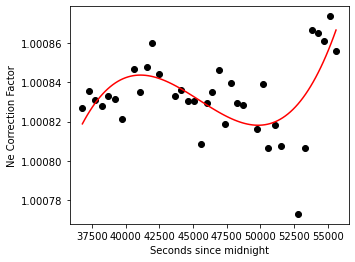

In [50]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=3, fit='poly')

## SAving as pickle, can then load as a pickle

In [51]:
import pickle
with open('Ne_Line_Regression_09.16.22.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)

In [52]:
with open('Ne_Line_Regression_09.16.22.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

## You can then load these pickles into the notebook where you fit your Diad data|